<a href="https://colab.research.google.com/github/ssravali/Research-1/blob/master/cnn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Libraries initiated
import numpy as np
import pickle
import matplotlib.pyplot as plt  
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import logging
from time import time
import pandas as pd
from keras.layers import Flatten
from keras import optimizers
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing import sequence
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
import scipy.io as sio
import keras
import random
print("Imported libraries")

Using TensorFlow backend.


Imported libraries


- Here data is taken from the agument.mat file which has the signals with even their noises.
- The y is converted to one hot so that it is easy for the clssiafier
- Test data also has noise added in it so only raw signals are tested for accuracy
- The data is split into 3 sets. Test Train and Val

In [0]:
mat_contents = sio.loadmat('augtestx.mat')
testx = np.array(mat_contents['test_x'])
test_x = testx[0:200]

mat_contents = sio.loadmat('augtesty.mat')
testy = np.array(mat_contents['test_y'])
test_y = testy[0:200]

mat_contents = sio.loadmat('augtrainx.mat')
train_x = np.array(mat_contents['train_x'])

mat_contents = sio.loadmat('augtrainy.mat')
trainy = np.array(mat_contents['train_y'])

train_x, val_x, train_y, val_y = train_test_split(train_x, trainy, test_size=0.2, random_state=42)
# binary encode
train_y = OneHotEncoder(sparse=False,categories='auto').fit_transform(train_y)
test_y = OneHotEncoder(sparse=False,categories='auto').fit_transform(test_y)
val_y = OneHotEncoder(sparse=False,categories='auto').fit_transform(val_y)
print("Train_y one hot:", train_y.shape)
print("Test_y one hot:", test_y.shape)
print("val_y one hot:", val_y.shape)

#train_x = train_x.reshape(400,2800,10,1)
#test_x = test_x.reshape(200,2800,10,1)
print(train_x.shape)
print(test_x.shape)
print(val_x.shape)
classes = np.unique(trainy)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
print("loaded data")


Train_y one hot: (960, 10)
Test_y one hot: (200, 10)
val_y one hot: (240, 10)
(960, 2800, 10)
(200, 2800, 10)
(240, 2800, 10)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]
loaded data


This is the initial cnn structure taken from paper 3.

In [0]:
#CNN
model = Sequential()
model.add(Conv1D(32, kernel_size=(10), activation='relu', data_format="channels_last"))
model.add(Conv1D(32, kernel_size=(3), activation='relu', data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Conv1D(64, kernel_size=(5), activation='relu', data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Conv1D(64, kernel_size=(1), activation='relu', data_format="channels_last"))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizers.SGD(lr=0.001, momentum=0.9, decay=0.0005),
              metrics=['accuracy'])

history = model.fit(train_x, train_y,batch_size=100,epochs=10,verbose=2,validation_split=0.2)
model.summary()
print("Model Created") 

Train on 960 samples, validate on 240 samples
Epoch 1/10
 - 10s - loss: 8.3200 - acc: 0.1479 - val_loss: 6.5874 - val_acc: 0.3250
Epoch 2/10
 - 10s - loss: 5.7852 - acc: 0.2208 - val_loss: 2.9246 - val_acc: 0.1375
Epoch 3/10
 - 9s - loss: 2.1872 - acc: 0.3688 - val_loss: 1.6501 - val_acc: 0.5167
Epoch 4/10
 - 9s - loss: 1.7250 - acc: 0.5375 - val_loss: 1.2715 - val_acc: 0.8167
Epoch 5/10
 - 9s - loss: 1.1901 - acc: 0.7208 - val_loss: 1.0089 - val_acc: 0.8042
Epoch 6/10
 - 9s - loss: 0.8481 - acc: 0.7865 - val_loss: 0.8881 - val_acc: 0.8417
Epoch 7/10
 - 9s - loss: 0.6188 - acc: 0.8667 - val_loss: 0.6901 - val_acc: 0.9333
Epoch 8/10
 - 9s - loss: 0.4382 - acc: 0.9292 - val_loss: 0.6170 - val_acc: 0.9167
Epoch 9/10
 - 9s - loss: 0.3277 - acc: 0.9583 - val_loss: 0.5628 - val_acc: 0.9542
Epoch 10/10
 - 9s - loss: 0.2695 - acc: 0.9802 - val_loss: 0.4720 - val_acc: 0.9792
_________________________________________________________________
Layer (type)                 Output Shape              

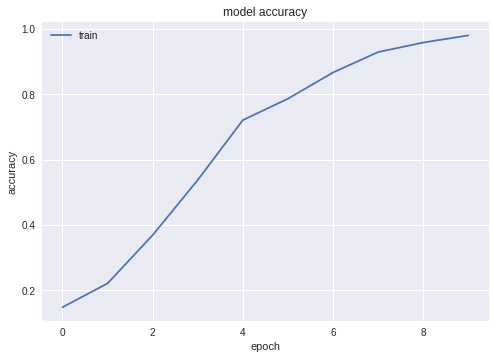

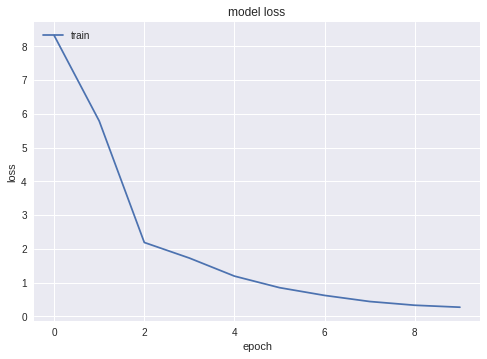

200/200 [==============================] - 1s 3ms/step
Test loss: 1.7954040050506592
Test accuracy: 0.53


In [0]:
#plotting training
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
  # summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#testing
score = model.evaluate(test_x, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [0]:
pred_ty = model.predict(train_x)
print(pred_ty.shape)
predty =  np.argmax(pred_ty, axis=1).T
print(predty.shape)
pred_y = model.predict(test_x)
print(pred_y.shape)
predy = np.argmax(pred_y, axis=1).T
print(predy.shape)
print(confusion_matrix(trainy, predty))
print(classification_report(trainy, predty))
print(confusion_matrix(testy[0:200], predy))
print(classification_report(testy[0:200], predy))

(1200, 10)
(1200,)
(200, 10)
(200,)
[[117   0   3   0   0   0   0   0   0   0]
 [  0 114   0   3   0   0   3   0   0   0]
 [  0   0 120   0   0   0   0   0   0   0]
 [  0   0   0 120   0   0   0   0   0   0]
 [  0   0   3   0 117   0   0   0   0   0]
 [  0   0   3   0   0 117   0   0   0   0]
 [  0   0   3   3   0   0 114   0   0   0]
 [  0   0   0   0   0   0   0 120   0   0]
 [  3   0   0   0   0   0   0   0 117   0]
 [  1   0   0   0   0   0   0   0   0 119]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       120
           1       1.00      0.95      0.97       120
           2       0.91      1.00      0.95       120
           3       0.95      1.00      0.98       120
           4       1.00      0.97      0.99       120
           5       1.00      0.97      0.99       120
           6       0.97      0.95      0.96       120
           7       1.00      1.00      1.00       120
           8       1.00      0.97      0.99   

- Paper 3's model has been used to classify. 
- Validation set is chosen from the last few records hence the data might have been totally independent of the people
- the accuracy attained was 53 while classifying data including noise

Train on 960 samples, validate on 240 samples
Epoch 1/10
 - 11s - loss: 4.1433 - acc: 0.1052 - val_loss: 4.1463 - val_acc: 0.0042
Epoch 2/10
 - 9s - loss: 4.1432 - acc: 0.1052 - val_loss: 4.1462 - val_acc: 0.0042
Epoch 3/10
 - 9s - loss: 4.1431 - acc: 0.1052 - val_loss: 4.1460 - val_acc: 0.0042
Epoch 4/10
 - 10s - loss: 4.1430 - acc: 0.1052 - val_loss: 4.1458 - val_acc: 0.0042
Epoch 5/10
 - 9s - loss: 4.1428 - acc: 0.1052 - val_loss: 4.1456 - val_acc: 0.0042
Epoch 6/10
 - 9s - loss: 4.1427 - acc: 0.1052 - val_loss: 4.1454 - val_acc: 0.0042
Epoch 7/10
 - 9s - loss: 4.1425 - acc: 0.1052 - val_loss: 4.1452 - val_acc: 0.0042
Epoch 8/10
 - 9s - loss: 4.1424 - acc: 0.1052 - val_loss: 4.1450 - val_acc: 0.0042
Epoch 9/10
 - 9s - loss: 4.1422 - acc: 0.1052 - val_loss: 4.1448 - val_acc: 0.0042
Epoch 10/10
 - 10s - loss: 4.1421 - acc: 0.1052 - val_loss: 4.1446 - val_acc: 0.0042
_________________________________________________________________
Layer (type)                 Output Shape             

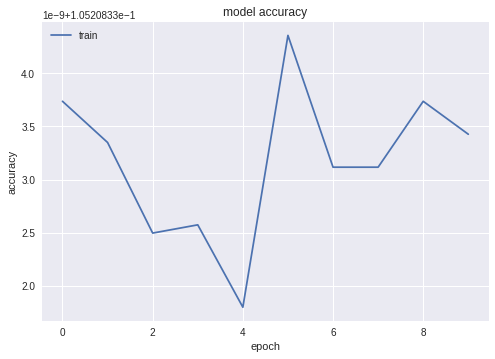

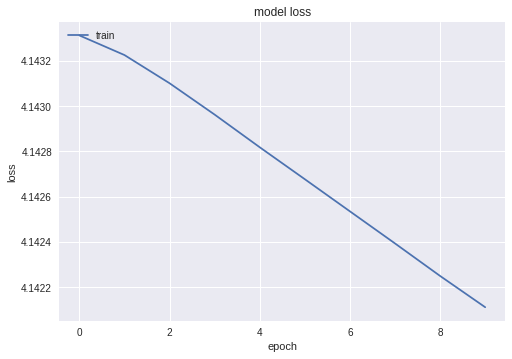

200/200 [==============================] - 1s 3ms/step
Test loss: 4.176444358825684
Test accuracy: 0.085
(200, 10)
(200,)
[[ 1  0  1 15  0  1  0  2  0  0]
 [ 0  0  0 15  0  1  1  3  0  0]
 [ 0  0  0 16  1  0  2  1  0  0]
 [ 0  0  1 14  0  0  1  4  0  0]
 [ 1  0  0 18  0  0  1  0  0  0]
 [ 0  0  0 17  0  0  0  3  0  0]
 [ 1  0  0 12  0  0  1  6  0  0]
 [ 0  0  0 19  0  0  0  1  0  0]
 [ 0  0  1 16  0  0  0  3  0  0]
 [ 0  0  0 15  1  0  3  1  0  0]]
              precision    recall  f1-score   support

           0       0.33      0.05      0.09        20
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        20
           3       0.09      0.70      0.16        20
           4       0.00      0.00      0.00        20
           5       0.00      0.00      0.00        20
           6       0.11      0.05      0.07        20
           7       0.04      0.05      0.05        20
           8       0.00      0.00      0.00        20
      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Train on 960 samples, validate on 240 samples
Epoch 1/10
 - 11s - loss: 4.0603 - acc: 0.0771 - val_loss: 3.3436 - val_acc: 0.0667
Epoch 2/10
 - 9s - loss: 4.0602 - acc: 0.0771 - val_loss: 3.3435 - val_acc: 0.0667
Epoch 3/10
 - 9s - loss: 4.0600 - acc: 0.0771 - val_loss: 3.3434 - val_acc: 0.0667
Epoch 4/10
 - 9s - loss: 4.0598 - acc: 0.0771 - val_loss: 3.3432 - val_acc: 0.0667
Epoch 5/10
 - 9s - loss: 4.0597 - acc: 0.0771 - val_loss: 3.3431 - val_acc: 0.0667
Epoch 6/10
 - 9s - loss: 4.0595 - acc: 0.0771 - val_loss: 3.3430 - val_acc: 0.0667
Epoch 7/10
 - 9s - loss: 4.0593 - acc: 0.0771 - val_loss: 3.3428 - val_acc: 0.0667
Epoch 8/10
 - 9s - loss: 4.0592 - acc: 0.0771 - val_loss: 3.3427 - val_acc: 0.0667
Epoch 9/10
 - 9s - loss: 4.0590 - acc: 0.0771 - val_loss: 3.3426 - val_acc: 0.0667
Epoch 10/10
 - 9s - loss: 4.0588 - acc: 0.0771 - val_loss: 3.3425 - val_acc: 0.0667
_________________________________________________________________
Layer (type)                 Output Shape              P

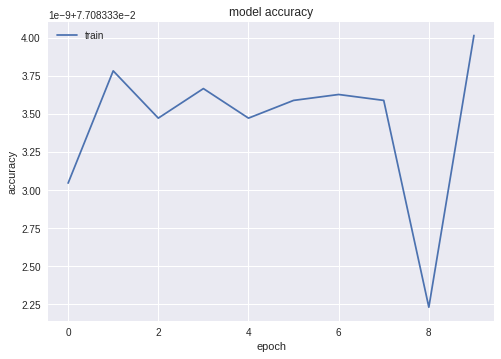

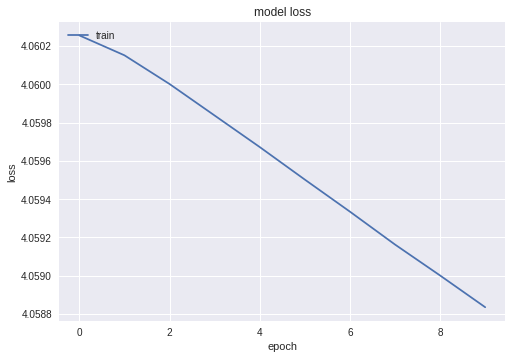

200/200 [==============================] - 1s 3ms/step
Test loss: 3.777680597305298
Test accuracy: 0.075
(200, 10)
(200,)
[[4 0 1 1 2 5 0 4 2 1]
 [4 0 2 0 2 0 0 6 5 1]
 [0 0 6 2 1 2 0 2 7 0]
 [5 0 0 1 2 4 0 4 4 0]
 [5 0 1 2 3 1 0 3 3 2]
 [5 0 0 1 7 0 0 2 0 5]
 [4 0 1 0 6 1 0 3 3 2]
 [3 0 4 0 0 7 0 0 6 0]
 [1 0 0 1 8 5 0 2 1 2]
 [3 0 4 2 1 0 0 3 7 0]]
              precision    recall  f1-score   support

           0       0.12      0.20      0.15        20
           1       0.00      0.00      0.00        20
           2       0.32      0.30      0.31        20
           3       0.10      0.05      0.07        20
           4       0.09      0.15      0.12        20
           5       0.00      0.00      0.00        20
           6       0.00      0.00      0.00        20
           7       0.00      0.00      0.00        20
           8       0.03      0.05      0.03        20
           9       0.00      0.00      0.00        20

   micro avg       0.07      0.07      0.07       2

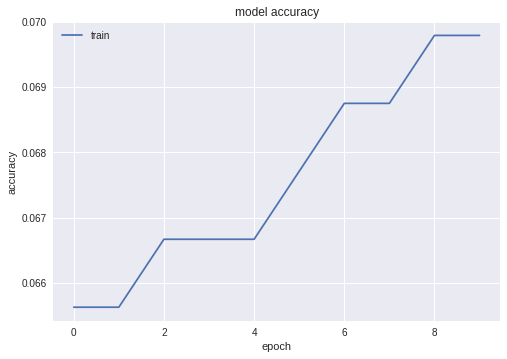

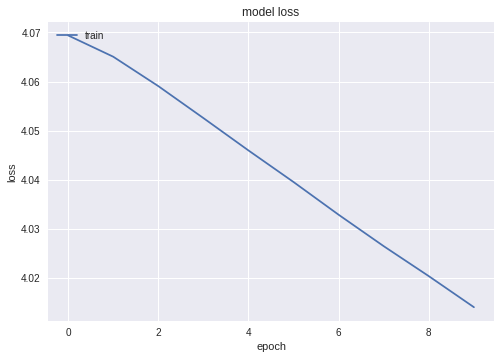

200/200 [==============================] - 1s 3ms/step
Test loss: 3.8803835487365723
Test accuracy: 0.135
(200, 10)
(200,)
[[ 7  7  0  1  2  2  0  0  1  0]
 [ 7  3  0  0  0  7  1  0  2  0]
 [ 7  3  0  0  0  9  0  0  1  0]
 [ 4  3  1  4  1  6  0  0  1  0]
 [ 6  3  2  1  3  5  0  0  0  0]
 [ 5  1  0  5  1  5  1  0  1  1]
 [ 7  3  0  1  2  2  2  0  3  0]
 [10  1  0  0  0  9  0  0  0  0]
 [ 9  5  1  1  0  1  0  0  3  0]
 [ 2  4  0  0  1 11  0  0  2  0]]
              precision    recall  f1-score   support

           0       0.11      0.35      0.17        20
           1       0.09      0.15      0.11        20
           2       0.00      0.00      0.00        20
           3       0.31      0.20      0.24        20
           4       0.30      0.15      0.20        20
           5       0.09      0.25      0.13        20
           6       0.50      0.10      0.17        20
           7       0.00      0.00      0.00        20
           8       0.21      0.15      0.18        20
     

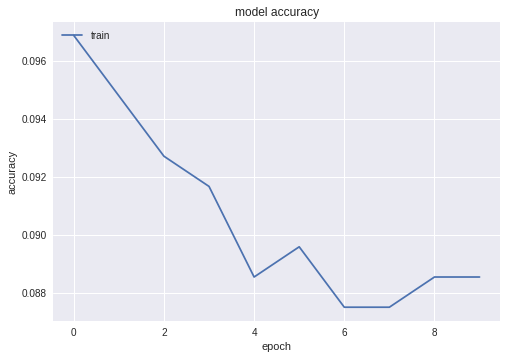

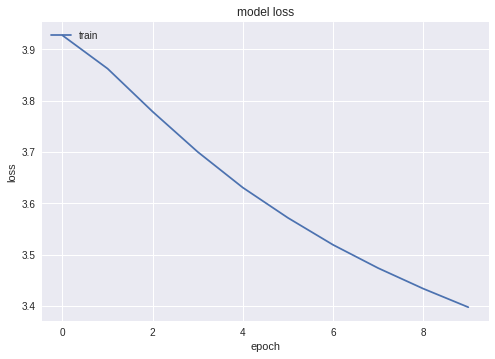

200/200 [==============================] - 1s 3ms/step
Test loss: 3.1642977714538576
Test accuracy: 0.145
(200, 10)
(200,)
[[ 2  0  2  0  1  4  6  4  1  0]
 [ 0  0  1  0  5  6  2  2  4  0]
 [ 2  0  0  0  1  3  6  6  2  0]
 [ 1  0  0  0  1 12  2  2  2  0]
 [ 3  0  0  0  9  3  1  1  2  1]
 [ 0  0  0  0  7 10  1  2  0  0]
 [ 1  0  2  1  4  5  2  4  1  0]
 [ 4  0  1  0  0  8  3  4  0  0]
 [ 1  0  1  0  3  8  4  1  2  0]
 [ 1  0  1  1  3  6  1  4  3  0]]
              precision    recall  f1-score   support

           0       0.13      0.10      0.11        20
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        20
           4       0.26      0.45      0.33        20
           5       0.15      0.50      0.24        20
           6       0.07      0.10      0.08        20
           7       0.13      0.20      0.16        20
           8       0.12      0.10      0.11        20
     

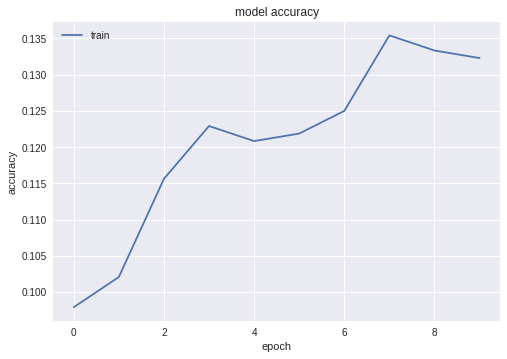

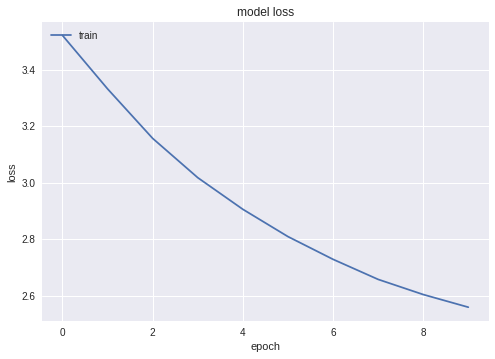

200/200 [==============================] - 1s 3ms/step
Test loss: 2.654834270477295
Test accuracy: 0.13
(200, 10)
(200,)
[[0 3 2 3 3 1 3 4 1 0]
 [0 3 2 2 1 3 3 4 1 1]
 [1 7 4 3 0 0 0 3 1 1]
 [0 6 0 2 2 0 3 6 1 0]
 [1 1 0 2 6 2 1 4 3 0]
 [0 3 1 2 1 2 1 8 0 2]
 [1 1 1 2 1 2 2 6 3 1]
 [1 3 6 1 2 1 1 4 1 0]
 [0 4 1 0 2 6 0 4 3 0]
 [0 1 1 8 2 0 2 6 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.09      0.15      0.12        20
           2       0.22      0.20      0.21        20
           3       0.08      0.10      0.09        20
           4       0.30      0.30      0.30        20
           5       0.12      0.10      0.11        20
           6       0.12      0.10      0.11        20
           7       0.08      0.20      0.12        20
           8       0.21      0.15      0.18        20
           9       0.00      0.00      0.00        20

   micro avg       0.13      0.13      0.13       20

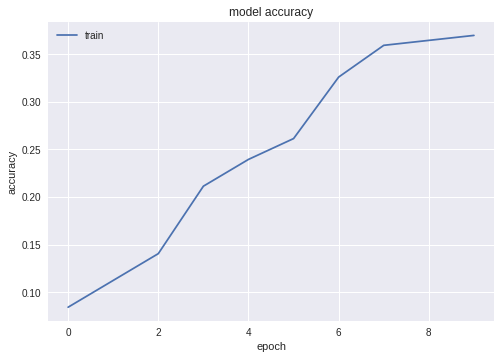

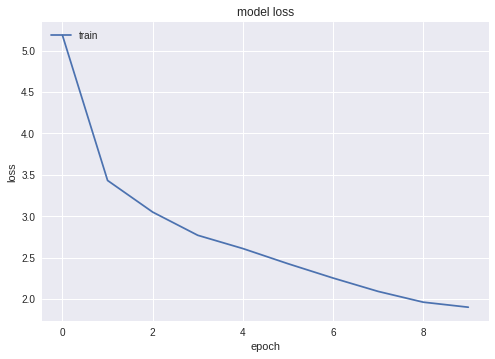

200/200 [==============================] - 1s 3ms/step
Test loss: 2.3122402381896974
Test accuracy: 0.255
(200, 10)
(200,)
[[5 7 1 1 1 0 0 3 2 0]
 [3 7 1 1 1 1 4 2 0 0]
 [8 2 6 1 1 0 1 1 0 0]
 [1 3 1 5 2 3 0 2 1 2]
 [2 2 1 1 5 7 2 0 0 0]
 [0 1 1 0 3 9 4 0 1 1]
 [1 4 1 2 0 5 5 2 0 0]
 [2 2 1 6 0 1 2 4 2 0]
 [0 1 0 1 3 6 3 0 5 1]
 [5 2 4 4 1 0 0 3 1 0]]
              precision    recall  f1-score   support

           0       0.19      0.25      0.21        20
           1       0.23      0.35      0.27        20
           2       0.35      0.30      0.32        20
           3       0.23      0.25      0.24        20
           4       0.29      0.25      0.27        20
           5       0.28      0.45      0.35        20
           6       0.24      0.25      0.24        20
           7       0.24      0.20      0.22        20
           8       0.42      0.25      0.31        20
           9       0.00      0.00      0.00        20

   micro avg       0.26      0.26      0.26       

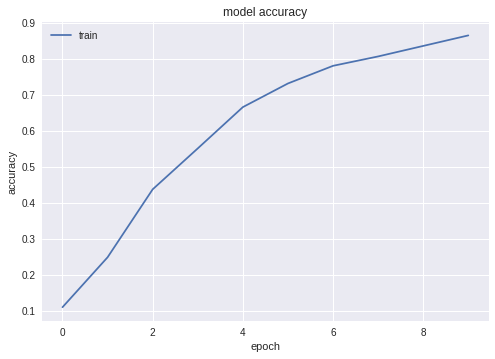

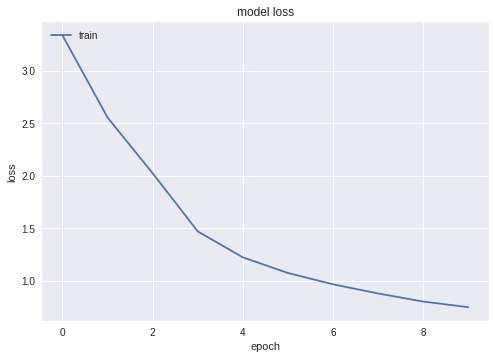

200/200 [==============================] - 1s 3ms/step
Test loss: 2.057346477508545
Test accuracy: 0.4
(200, 10)
(200,)
[[ 9  2  3  0  1  2  0  1  1  1]
 [ 3  7  1  3  0  3  0  0  2  1]
 [ 3  3 11  0  1  0  1  0  0  1]
 [ 0  7  1  7  0  3  0  0  2  0]
 [ 1  0  0  0  8  6  2  0  1  2]
 [ 0  0  0  1  0 14  3  0  0  2]
 [ 5  2  2  0  0  3  6  0  2  0]
 [ 0  4  3  2  0  2  0  6  3  0]
 [ 0  1  0  1  3  2  2  0 10  1]
 [ 3  4  7  3  0  1  0  0  0  2]]
              precision    recall  f1-score   support

           0       0.38      0.45      0.41        20
           1       0.23      0.35      0.28        20
           2       0.39      0.55      0.46        20
           3       0.41      0.35      0.38        20
           4       0.62      0.40      0.48        20
           5       0.39      0.70      0.50        20
           6       0.43      0.30      0.35        20
           7       0.86      0.30      0.44        20
           8       0.48      0.50      0.49        20
        

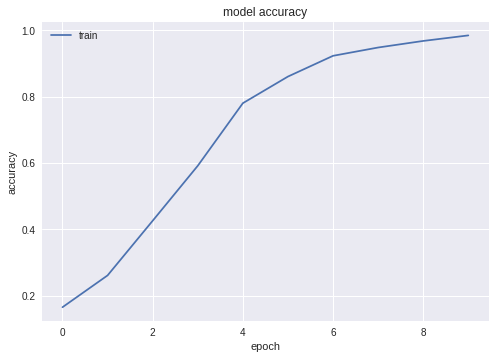

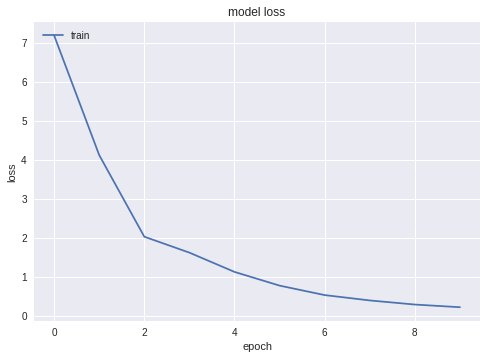

200/200 [==============================] - 1s 3ms/step
Test loss: 1.2504830479621887
Test accuracy: 0.65
(200, 10)
(200,)
[[12  0  0  0  1  0  2  1  3  1]
 [ 1 13  1  0  0  0  4  1  0  0]
 [ 1  2 16  0  0  0  1  0  0  0]
 [ 0  3  2 14  0  0  1  0  0  0]
 [ 2  0  1  0 14  0  1  0  0  2]
 [ 2  0  0  0  0 13  3  1  0  1]
 [ 4  0  1  0  0  0 12  1  0  2]
 [ 0  0  3  0  1  0  0 11  1  4]
 [ 0  0  0  3  0  0  4  0 13  0]
 [ 4  0  3  0  0  0  0  1  0 12]]
              precision    recall  f1-score   support

           0       0.46      0.60      0.52        20
           1       0.72      0.65      0.68        20
           2       0.59      0.80      0.68        20
           3       0.82      0.70      0.76        20
           4       0.88      0.70      0.78        20
           5       1.00      0.65      0.79        20
           6       0.43      0.60      0.50        20
           7       0.69      0.55      0.61        20
           8       0.76      0.65      0.70        20
      

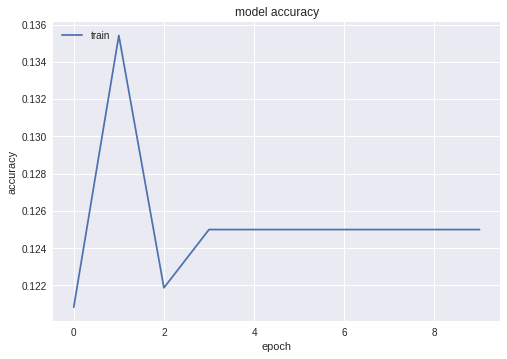

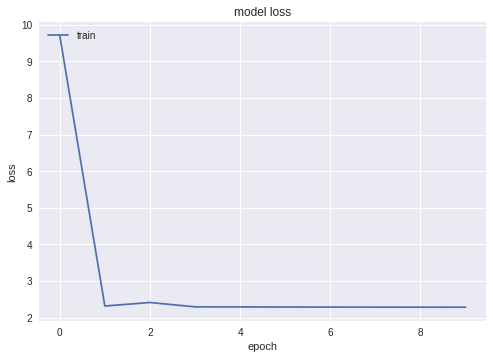

200/200 [==============================] - 1s 3ms/step
Test loss: 2.3101885604858396
Test accuracy: 0.1
(200, 10)
(200,)
[[ 0  0 20  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.00      0.00      0.00        20
           2       0.10      1.00      0.18        20
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        20
           5       0.00      0.00      0.00        20
           6       0.00      0.00      0.00        20
           7       0.00      0.00      0.00        20
           8       0.00      0.00      0.00        20
       

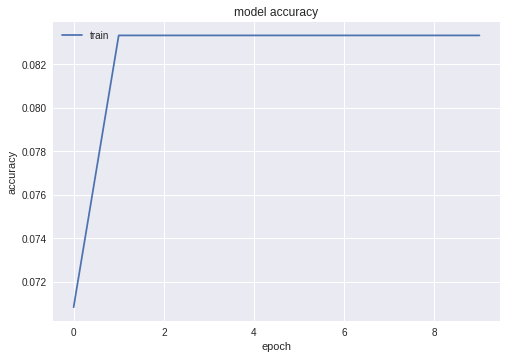

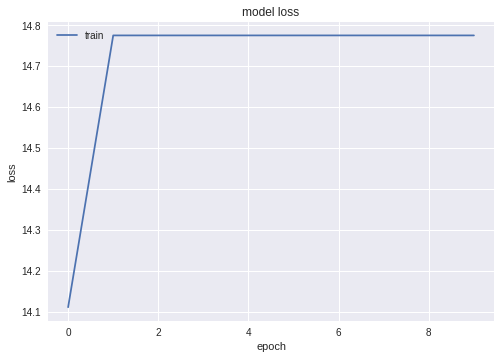

200/200 [==============================] - 1s 3ms/step
Test loss: 14.506285858154296
Test accuracy: 0.1
(200, 10)
(200,)
[[ 0  0  0  0  0 20  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        20
           5       0.10      1.00      0.18        20
           6       0.00      0.00      0.00        20
           7       0.00      0.00      0.00        20
           8       0.00      0.00      0.00        20
       

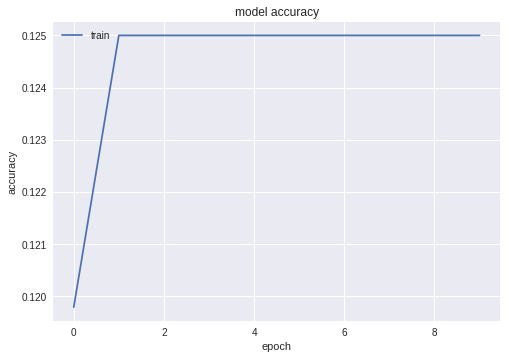

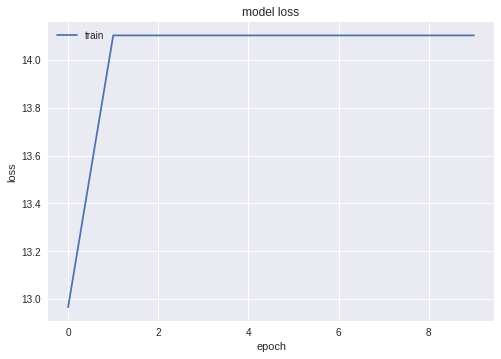

200/200 [==============================] - 1s 3ms/step
Test loss: 14.506285858154296
Test accuracy: 0.1
(200, 10)
(200,)
[[20  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.10      1.00      0.18        20
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        20
           5       0.00      0.00      0.00        20
           6       0.00      0.00      0.00        20
           7       0.00      0.00      0.00        20
           8       0.00      0.00      0.00        20
       

In [0]:
#CNN
l = 0.0000000001
while(l<=1):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=(10), activation='relu', data_format="channels_last"))
    model.add(Conv1D(32, kernel_size=(3), activation='relu', data_format="channels_last"))
    model.add(MaxPooling1D(pool_size=(3)))
    model.add(Conv1D(64, kernel_size=(5), activation='relu', data_format="channels_last"))
    model.add(MaxPooling1D(pool_size=(3)))
    model.add(Conv1D(64, kernel_size=(1), activation='relu', data_format="channels_last"))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=optimizers.SGD(lr=l, momentum=0.9, decay=0.0005),
                  metrics=['accuracy'])

    history = model.fit(train_x, train_y,batch_size=100,epochs=10,verbose=2,validation_split=0.2)
    model.summary()
    print("Model Created") 

    #plotting training
    plt.plot(history.history['acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
      # summarize history for loss
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    #testing
    score = model.evaluate(test_x, test_y, verbose=1)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    pred_y = model.predict(test_x)
    print(pred_y.shape)
    predy = np.argmax(pred_y, axis=1).T
    print(predy.shape)
    print(confusion_matrix(testy[0:200], predy))
    print(classification_report(testy[0:200], predy))
    l = l*10
    print("New l: ",l)

- Paper 3 network is used
- Learning rate was varied and 0.001 is said to be the best in classifying test data with noise.
- Validation was done on independent people data.

Train on 960 samples, validate on 240 samples
Epoch 1/50
 - 13s - loss: 6.7296 - acc: 0.1510 - val_loss: 5.7088 - val_acc: 0.4333
Epoch 2/50
 - 10s - loss: 2.5967 - acc: 0.3271 - val_loss: 1.8571 - val_acc: 0.4917
Epoch 3/50
 - 10s - loss: 1.6487 - acc: 0.5177 - val_loss: 1.2912 - val_acc: 0.7333
Epoch 4/50
 - 10s - loss: 1.1453 - acc: 0.7010 - val_loss: 0.8680 - val_acc: 0.8708
Epoch 5/50
 - 10s - loss: 0.7914 - acc: 0.8292 - val_loss: 0.6674 - val_acc: 0.9375
Epoch 6/50
 - 10s - loss: 0.5436 - acc: 0.9021 - val_loss: 0.6228 - val_acc: 0.9458
Epoch 7/50
 - 10s - loss: 0.3698 - acc: 0.9646 - val_loss: 0.5023 - val_acc: 0.9750
Epoch 8/50
 - 10s - loss: 0.2837 - acc: 0.9760 - val_loss: 0.4798 - val_acc: 0.9875
Epoch 9/50
 - 10s - loss: 0.2247 - acc: 0.9885 - val_loss: 0.4361 - val_acc: 0.9875
Epoch 10/50
 - 10s - loss: 0.1807 - acc: 0.9948 - val_loss: 0.4399 - val_acc: 0.9917
Epoch 11/50
 - 10s - loss: 0.1588 - acc: 0.9979 - val_loss: 0.4042 - val_acc: 1.0000
Epoch 12/50
 - 10s - loss: 0

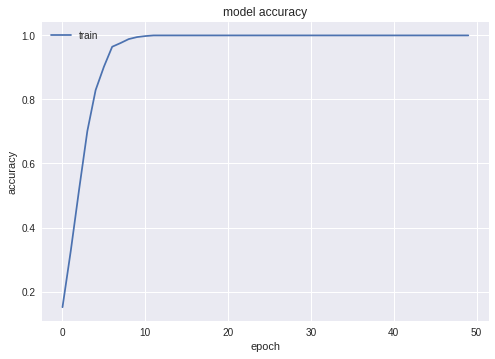

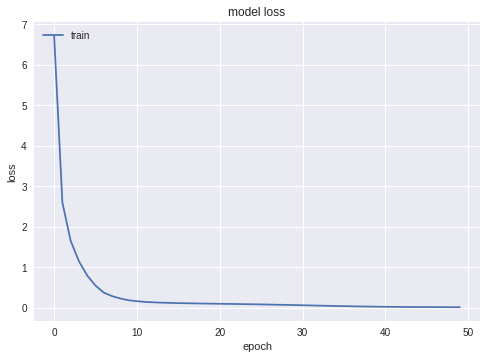

200/200 [==============================] - 1s 3ms/step
Test loss: 1.4178623294830321
Test accuracy: 0.675
(200, 10)
(200,)
[[14  1  1  0  1  0  1  0  1  1]
 [ 1 12  0  6  0  0  1  0  0  0]
 [ 0  0 19  0  0  0  1  0  0  0]
 [ 0  2  3 13  0  0  2  0  0  0]
 [ 1  0  1  0 14  0  4  0  0  0]
 [ 0  0  0  0  0 14  3  0  0  3]
 [ 0  0  1  1  0  0 12  1  0  5]
 [ 1  0  3  3  0  2  3  8  0  0]
 [ 0  1  0  1  2  0  0  0 16  0]
 [ 2  0  2  0  0  2  0  0  1 13]]
              precision    recall  f1-score   support

           0       0.74      0.70      0.72        20
           1       0.75      0.60      0.67        20
           2       0.63      0.95      0.76        20
           3       0.54      0.65      0.59        20
           4       0.82      0.70      0.76        20
           5       0.78      0.70      0.74        20
           6       0.44      0.60      0.51        20
           7       0.89      0.40      0.55        20
           8       0.89      0.80      0.84        20
     

In [0]:
model = Sequential()
model.add(Conv1D(32, kernel_size=(10), activation='relu', data_format="channels_last"))
model.add(Conv1D(32, kernel_size=(3), activation='relu', data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Conv1D(64, kernel_size=(5), activation='relu', data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Conv1D(64, kernel_size=(1), activation='relu', data_format="channels_last"))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizers.SGD(lr=0.001, momentum=0.9, decay=0.0005),
              metrics=['accuracy'])

history = model.fit(train_x, train_y,batch_size=100,epochs=50,verbose=2,validation_split=0.2)
model.summary()
print("Model Created") 

#plotting training
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#testing
score = model.evaluate(test_x, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred_y = model.predict(test_x)
print(pred_y.shape)
predy = np.argmax(pred_y, axis=1).T
print(predy.shape)
print(confusion_matrix(testy[0:200], predy))
print(classification_report(testy[0:200], predy))

- Paper 3 structure
- Epochs were increase and the accuracy incresed for a 0.001 lr

Train on 960 samples, validate on 240 samples
Epoch 1/10
 - 11s - loss: 6.6156 - acc: 0.2073 - val_loss: 5.8692 - val_acc: 0.2708
Epoch 2/10
 - 9s - loss: 3.5549 - acc: 0.3312 - val_loss: 2.3655 - val_acc: 0.2125
Epoch 3/10
 - 9s - loss: 1.9774 - acc: 0.4313 - val_loss: 1.7198 - val_acc: 0.5250
Epoch 4/10
 - 9s - loss: 1.3424 - acc: 0.6875 - val_loss: 1.3202 - val_acc: 0.6708
Epoch 5/10
 - 9s - loss: 0.9112 - acc: 0.8094 - val_loss: 1.0123 - val_acc: 0.7667
Epoch 6/10
 - 9s - loss: 0.6641 - acc: 0.8792 - val_loss: 0.8044 - val_acc: 0.8125
Epoch 7/10
 - 9s - loss: 0.4939 - acc: 0.9365 - val_loss: 0.6865 - val_acc: 0.8500
Epoch 8/10
 - 9s - loss: 0.3974 - acc: 0.9583 - val_loss: 0.4872 - val_acc: 0.9042
Epoch 9/10
 - 9s - loss: 0.3265 - acc: 0.9740 - val_loss: 0.4192 - val_acc: 0.9250
Epoch 10/10
 - 9s - loss: 0.2804 - acc: 0.9854 - val_loss: 0.3747 - val_acc: 0.9208
_________________________________________________________________
Layer (type)                 Output Shape              P

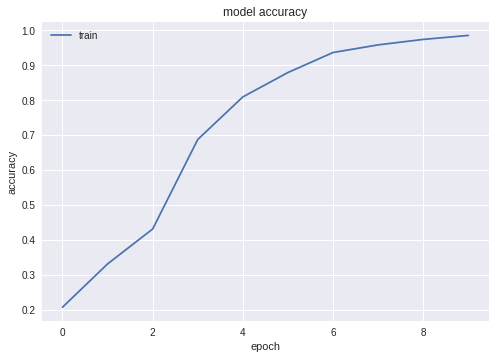

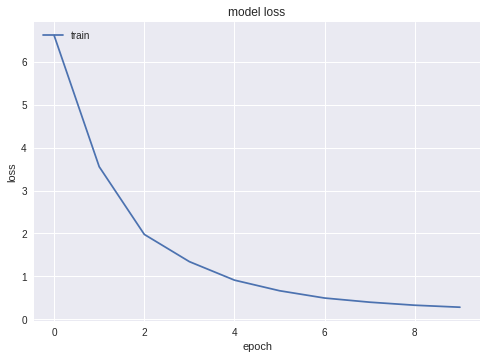

200/200 [==============================] - 1s 3ms/step
Test loss: 1.4492722940444946
Test accuracy: 0.555
(200, 10)
(200,)
[[14  0  0  2  1  1  1  0  0  1]
 [ 5 10  0  0  0  0  4  0  1  0]
 [ 9  0 10  0  0  0  1  0  0  0]
 [ 2  0  1 15  1  0  1  0  0  0]
 [ 1  0  0  3 12  0  4  0  0  0]
 [ 0  0  0  0  3 13  4  0  0  0]
 [ 3  0  1  0  1  4  9  1  1  0]
 [ 1  1  1  7  0  1  1  8  0  0]
 [ 2  0  0  0  0  0  2  0 16  0]
 [ 8  0  2  1  0  1  0  0  4  4]]
              precision    recall  f1-score   support

           0       0.31      0.70      0.43        20
           1       0.91      0.50      0.65        20
           2       0.67      0.50      0.57        20
           3       0.54      0.75      0.63        20
           4       0.67      0.60      0.63        20
           5       0.65      0.65      0.65        20
           6       0.33      0.45      0.38        20
           7       0.89      0.40      0.55        20
           8       0.73      0.80      0.76        20
     

In [0]:
model = Sequential()
model.add(Conv1D(32, kernel_size=(10), activation='relu', data_format="channels_last"))
model.add(Conv1D(32, kernel_size=(3), activation='relu', data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Conv1D(64, kernel_size=(5), activation='relu', data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Conv1D(64, kernel_size=(1), activation='relu', data_format="channels_last"))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizers.SGD(lr=0.001, momentum=0.9, decay=0.0005),
              metrics=['accuracy'])

history = model.fit(train_x, train_y,batch_size=100,epochs=10,verbose=2,validation_data=(val_x,val_y))
model.summary()
print("Model Created") 

#plotting training
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#testing
score = model.evaluate(test_x, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred_y = model.predict(test_x)
print(pred_y.shape)
predy = np.argmax(pred_y, axis=1).T
print(predy.shape)
print(confusion_matrix(testy[0:200], predy))
print(classification_report(testy[0:200], predy))

- Paper 3 struc
- Val data was chosen randomly
- test data is void of noise data
- accuracy droped

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 960 samples, validate on 240 samples
Epoch 1/50
 - 9s - loss: 6.6277 - acc: 0.1979 - val_loss: 6.0250 - val_acc: 0.3667
Epoch 2/50
 - 9s - loss: 5.6911 - acc: 0.3875 - val_loss: 4.3788 - val_acc: 0.4833
Epoch 3/50
 - 9s - loss: 3.4319 - acc: 0.4990 - val_loss: 2.0152 - val_acc: 0.4417
Epoch 4/50
 - 9s - loss: 1.9250 - acc: 0.3979 - val_loss: 1.7880 - val_acc: 0.5250
Epoch 5/50
 - 9s - loss: 1.4413 - acc: 0.6594 - val_loss: 1.5477 - val_acc: 0.4833
Epoch 6/50
 - 9s - loss: 1.0330 - acc: 0.7521 - val_loss: 1.0388 - val_acc: 0.7583
Epoch 7/50
 - 9s - loss: 0.6619 - acc: 0.8948 - val_loss: 0.6833 - val_acc: 0.8458
Epoch 8/50
 - 9s - loss: 0.4481 - acc: 0.9490 - val_loss: 0.5635 - val_acc: 0.8917
Epoch 9/50
 - 9s - loss: 0.3851 - acc: 0.9552 - val_loss: 0.5980 - val_acc: 0.8625
Epoch 10/50
 - 9s - loss: 0.3590 - acc: 0.9583 - val_loss: 0.3947 - val_acc: 0.9375
Epo

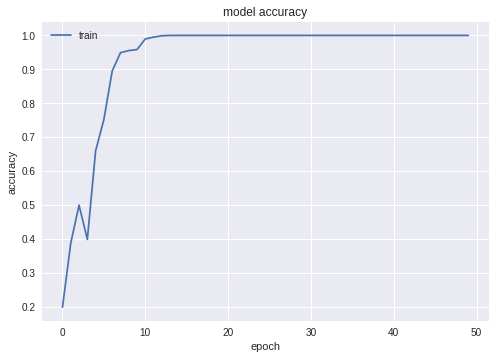

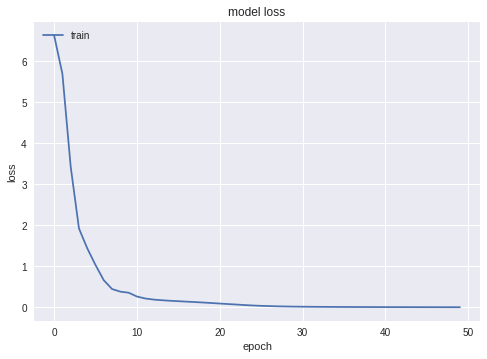

200/200 [==============================] - 1s 3ms/step
Test loss: 1.775714054107666
Test accuracy: 0.66
(200, 10)
(200,)
[[14  0  0  0  2  0  2  0  2  0]
 [ 0 14  1  1  0  0  3  1  0  0]
 [ 0  0 19  0  0  0  1  0  0  0]
 [ 0  2  2 13  0  0  2  1  0  0]
 [ 2  0  0  0 12  2  3  0  0  1]
 [ 0  0  0  0  0 12  5  0  0  3]
 [ 0  0  1  0  0  2 11  1  0  5]
 [ 0  2  3  7  0  0  0  7  1  0]
 [ 0  0  0  1  0  0  4  0 15  0]
 [ 0  0  4  0  0  0  1  0  0 15]]
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        20
           1       0.78      0.70      0.74        20
           2       0.63      0.95      0.76        20
           3       0.59      0.65      0.62        20
           4       0.86      0.60      0.71        20
           5       0.75      0.60      0.67        20
           6       0.34      0.55      0.42        20
           7       0.70      0.35      0.47        20
           8       0.83      0.75      0.79        20
       

In [0]:
model = Sequential()
model.add(Conv1D(32, kernel_size=(10), activation='relu', data_format="channels_last"))
model.add(Conv1D(32, kernel_size=(3), activation='relu', data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Conv1D(64, kernel_size=(5), activation='relu', data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Conv1D(64, kernel_size=(1), activation='relu', data_format="channels_last"))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizers.SGD(lr=0.001, momentum=0.9, decay=0.0005),
              metrics=['accuracy'])

history = model.fit(train_x, train_y,batch_size=100,epochs=50,verbose=2,validation_data=(val_x,val_y))
model.summary()
print("Model Created") 

#plotting training
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#testing
score = model.evaluate(test_x, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred_y = model.predict(test_x)
print(pred_y.shape)
predy = np.argmax(pred_y, axis=1).T
print(predy.shape)
print(confusion_matrix(testy[0:200], predy))
print(classification_report(testy[0:200], predy))

- Paper 3 struc
- Val data was chosen randomly
- test data is void of noise data
- accuracy increased as epochs increased

Train on 960 samples, validate on 240 samples
Epoch 1/20
 - 10s - loss: 7.8167 - acc: 0.1365 - val_loss: 8.8235 - val_acc: 0.2542
Epoch 2/20
 - 9s - loss: 6.8221 - acc: 0.2937 - val_loss: 2.9089 - val_acc: 0.2750
Epoch 3/20
 - 9s - loss: 2.3874 - acc: 0.2198 - val_loss: 2.2157 - val_acc: 0.2875
Epoch 4/20
 - 9s - loss: 2.1652 - acc: 0.2906 - val_loss: 2.1590 - val_acc: 0.2708
Epoch 5/20
 - 9s - loss: 2.0355 - acc: 0.3521 - val_loss: 1.8390 - val_acc: 0.3167
Epoch 6/20
 - 9s - loss: 1.6541 - acc: 0.4833 - val_loss: 1.6354 - val_acc: 0.5375
Epoch 7/20
 - 9s - loss: 1.5309 - acc: 0.5604 - val_loss: 1.4841 - val_acc: 0.5750
Epoch 8/20
 - 9s - loss: 1.3235 - acc: 0.5490 - val_loss: 1.4638 - val_acc: 0.5667
Epoch 9/20
 - 9s - loss: 1.1063 - acc: 0.7115 - val_loss: 1.3357 - val_acc: 0.6542
Epoch 10/20
 - 9s - loss: 1.0024 - acc: 0.7094 - val_loss: 1.1181 - val_acc: 0.7250
Epoch 11/20
 - 9s - loss: 0.8205 - acc: 0.7740 - val_loss: 0.9504 - val_acc: 0.7625
Epoch 12/20
 - 9s - loss: 0.9397 - acc

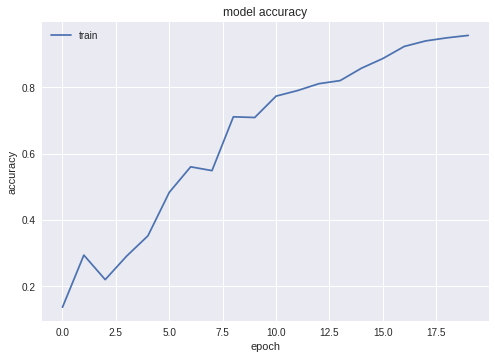

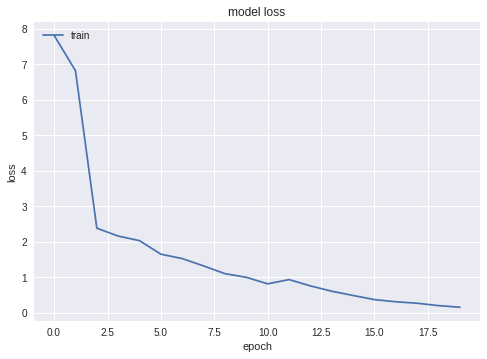

200/200 [==============================] - 1s 3ms/step
Test loss: 3.7003415298461912
Test accuracy: 0.585
(200, 10)
(200,)
[[10  0  1  0  1  0  0  0  3  5]
 [ 0 12  7  0  0  0  1  0  0  0]
 [ 0  4 13  1  2  0  0  0  0  0]
 [ 0  1  2  7  6  0  4  0  0  0]
 [ 0  0  0  1 15  1  3  0  0  0]
 [ 1  0  0  0  1 12  5  1  0  0]
 [ 0  1  0  5  0  1 12  1  0  0]
 [ 0  0  0  4  4  0  2 10  0  0]
 [ 1  0  0  0  0  1  1  0 13  4]
 [ 1  0  0  1  3  0  0  1  1 13]]
              precision    recall  f1-score   support

           0       0.77      0.50      0.61        20
           1       0.67      0.60      0.63        20
           2       0.57      0.65      0.60        20
           3       0.37      0.35      0.36        20
           4       0.47      0.75      0.58        20
           5       0.80      0.60      0.69        20
           6       0.43      0.60      0.50        20
           7       0.77      0.50      0.61        20
           8       0.76      0.65      0.70        20
     

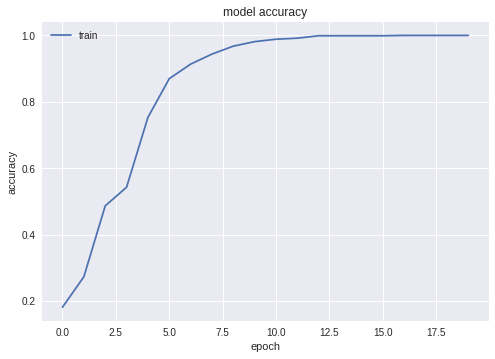

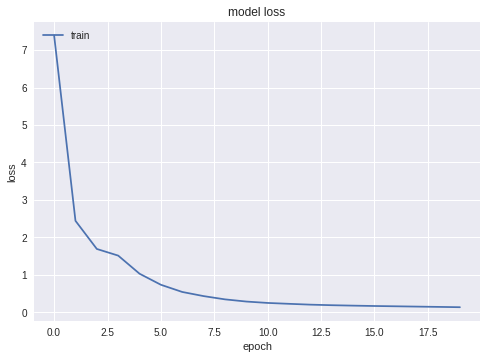

200/200 [==============================] - 1s 3ms/step
Test loss: 1.1533882379531861
Test accuracy: 0.68
(200, 10)
(200,)
[[14  2  0  0  0  0  2  0  1  1]
 [ 1 16  1  1  0  0  1  0  0  0]
 [ 2  1 16  0  0  0  1  0  0  0]
 [ 0  1  2 15  0  0  2  0  0  0]
 [ 1  0  0  1 11  3  3  0  0  1]
 [ 0  0  0  0  0 15  4  1  0  0]
 [ 2  0  1  0  0  2 14  1  0  0]
 [ 1  0  3  2  0  4  1  9  0  0]
 [ 2  0  0  0  0  0  4  0 14  0]
 [ 5  0  1  0  0  0  0  0  2 12]]
              precision    recall  f1-score   support

           0       0.50      0.70      0.58        20
           1       0.80      0.80      0.80        20
           2       0.67      0.80      0.73        20
           3       0.79      0.75      0.77        20
           4       1.00      0.55      0.71        20
           5       0.62      0.75      0.68        20
           6       0.44      0.70      0.54        20
           7       0.82      0.45      0.58        20
           8       0.82      0.70      0.76        20
      

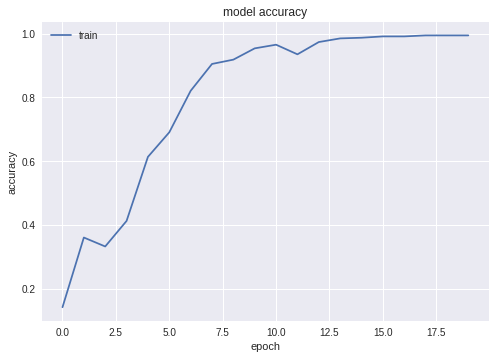

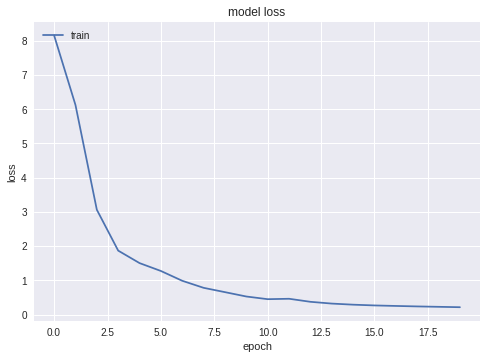

200/200 [==============================] - 1s 4ms/step
Test loss: 1.5361772394180297
Test accuracy: 0.605
(200, 10)
(200,)
[[12  0  0  0  2  2  2  0  1  1]
 [ 1 11  1  2  0  0  5  0  0  0]
 [ 0  0 19  0  0  0  1  0  0  0]
 [ 1  0  3 13  1  0  2  0  0  0]
 [ 3  0  0  1 12  1  3  0  0  0]
 [ 0  0  0  0  1  9  6  0  1  3]
 [ 0  1  1  0  0  3 11  0  1  3]
 [ 0  0  3  4  0  0  0  7  3  3]
 [ 0  0  0  0  1  2  4  0 13  0]
 [ 1  0  3  0  0  0  1  1  0 14]]
              precision    recall  f1-score   support

           0       0.67      0.60      0.63        20
           1       0.92      0.55      0.69        20
           2       0.63      0.95      0.76        20
           3       0.65      0.65      0.65        20
           4       0.71      0.60      0.65        20
           5       0.53      0.45      0.49        20
           6       0.31      0.55      0.40        20
           7       0.88      0.35      0.50        20
           8       0.68      0.65      0.67        20
     

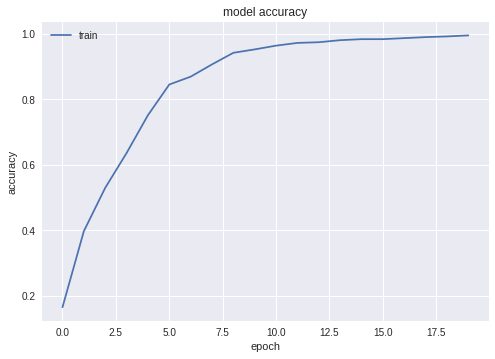

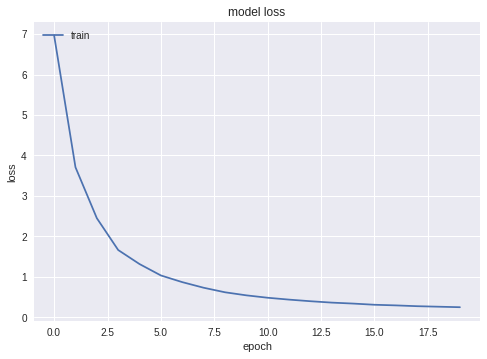

200/200 [==============================] - 1s 4ms/step
Test loss: 1.6324074602127074
Test accuracy: 0.545
(200, 10)
(200,)
[[12  0  1  1  1  0  3  1  0  1]
 [ 5 10  0  4  0  0  1  0  0  0]
 [ 2  1 16  0  0  0  1  0  0  0]
 [ 1  1  2 13  2  0  1  0  0  0]
 [ 2  0  1  1 11  0  5  0  0  0]
 [ 1  1  0  0  0 10  4  0  0  4]
 [ 2  1  1  0  0  2  9  0  3  2]
 [ 1  3  4  2  0  0  0  8  1  1]
 [ 0  2  0  1  0  0  3  0 13  1]
 [ 4  2  2  0  0  4  0  0  1  7]]
              precision    recall  f1-score   support

           0       0.40      0.60      0.48        20
           1       0.48      0.50      0.49        20
           2       0.59      0.80      0.68        20
           3       0.59      0.65      0.62        20
           4       0.79      0.55      0.65        20
           5       0.62      0.50      0.56        20
           6       0.33      0.45      0.38        20
           7       0.89      0.40      0.55        20
           8       0.72      0.65      0.68        20
     

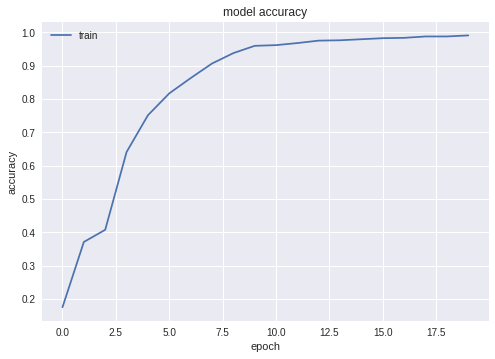

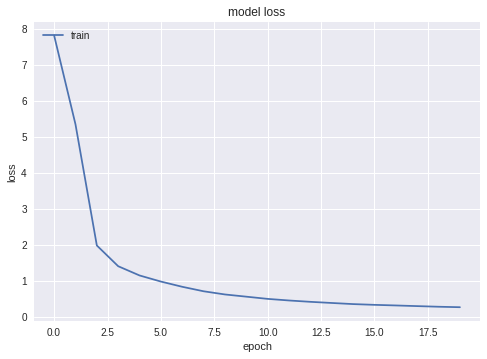

200/200 [==============================] - 1s 4ms/step
Test loss: 1.7787990808486938
Test accuracy: 0.5
(200, 10)
(200,)
[[11  1  1  0  0  1  2  1  1  2]
 [ 1 11  0  3  3  0  2  0  0  0]
 [ 1  1 17  0  0  0  1  0  0  0]
 [ 0  2  4  9  2  0  2  0  1  0]
 [ 0  0  1  2 10  2  5  0  0  0]
 [ 0  0  0  0  0 12  5  1  0  2]
 [ 3  1  2  0  0  3  9  0  1  1]
 [ 1  0  3  4  0  0  1  7  4  0]
 [ 0  0  0  3  2  0  3  1 10  1]
 [ 5  0  2  5  0  0  2  2  0  4]]
              precision    recall  f1-score   support

           0       0.50      0.55      0.52        20
           1       0.69      0.55      0.61        20
           2       0.57      0.85      0.68        20
           3       0.35      0.45      0.39        20
           4       0.59      0.50      0.54        20
           5       0.67      0.60      0.63        20
           6       0.28      0.45      0.35        20
           7       0.58      0.35      0.44        20
           8       0.59      0.50      0.54        20
       

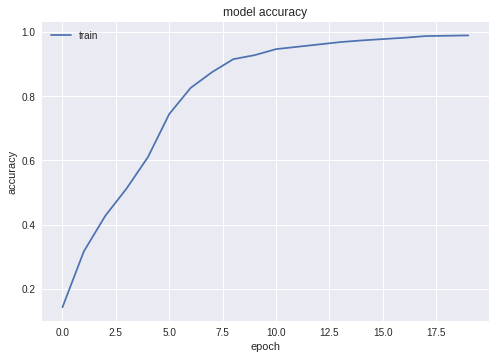

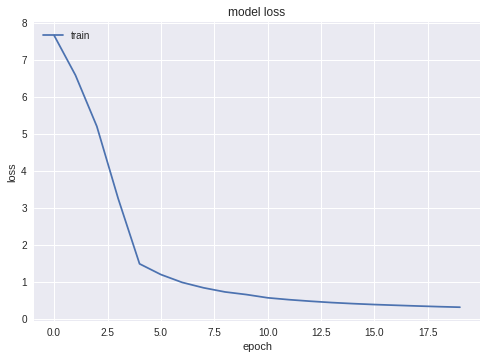

200/200 [==============================] - 1s 4ms/step
Test loss: 1.3740547943115233
Test accuracy: 0.64
(200, 10)
(200,)
[[13  0  0  1  0  3  1  0  1  1]
 [ 1 17  1  0  0  0  1  0  0  0]
 [ 3  1 14  0  0  0  1  0  0  1]
 [ 2  2  1 13  0  0  2  0  0  0]
 [ 0  0  0  0 14  3  1  0  0  2]
 [ 0  0  0  0  2 13  3  0  1  1]
 [ 1  0  1  0  0  2 12  1  0  3]
 [ 1  0  2  4  0  0  0  9  4  0]
 [ 0  1  0  0  1  2  4  0 12  0]
 [ 3  0  2  0  1  1  0  0  2 11]]
              precision    recall  f1-score   support

           0       0.54      0.65      0.59        20
           1       0.81      0.85      0.83        20
           2       0.67      0.70      0.68        20
           3       0.72      0.65      0.68        20
           4       0.78      0.70      0.74        20
           5       0.54      0.65      0.59        20
           6       0.48      0.60      0.53        20
           7       0.90      0.45      0.60        20
           8       0.60      0.60      0.60        20
      

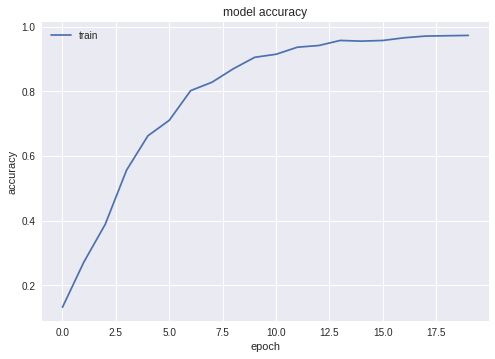

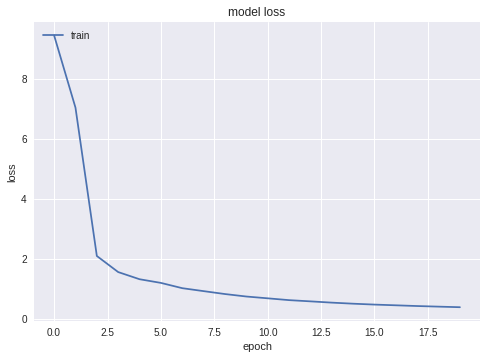

200/200 [==============================] - 1s 4ms/step
Test loss: 1.8565987539291382
Test accuracy: 0.405
(200, 10)
(200,)
[[ 8  1  0  3  1  2  1  2  1  1]
 [ 1  6  2  5  0  1  3  0  2  0]
 [ 1  0 17  0  1  0  1  0  0  0]
 [ 0  2  3  8  2  2  2  1  0  0]
 [ 0  1  0  4  9  4  2  0  0  0]
 [ 0  0  0  1  2  6  8  1  0  2]
 [ 2  0  1  0  0  4 10  1  1  1]
 [ 2  0  4  3  0  0  0  4  5  2]
 [ 0  1  0  1  0  5  4  0  9  0]
 [ 4  1  4  4  0  2  1  0  0  4]]
              precision    recall  f1-score   support

           0       0.44      0.40      0.42        20
           1       0.50      0.30      0.37        20
           2       0.55      0.85      0.67        20
           3       0.28      0.40      0.33        20
           4       0.60      0.45      0.51        20
           5       0.23      0.30      0.26        20
           6       0.31      0.50      0.38        20
           7       0.44      0.20      0.28        20
           8       0.50      0.45      0.47        20
     

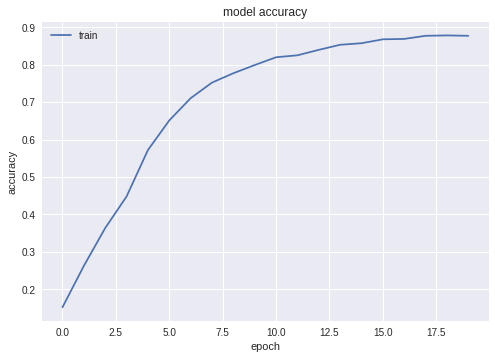

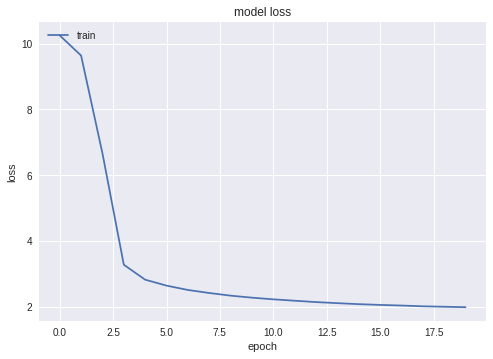

200/200 [==============================] - 1s 4ms/step
Test loss: 3.2511720705032348
Test accuracy: 0.455
(200, 10)
(200,)
[[ 0  4  1  1  3  1  1  3  1  5]
 [ 0  9  0  4  0  0  3  2  0  2]
 [ 0  0 18  1  0  0  1  0  0  0]
 [ 0  3  2 12  1  1  1  0  0  0]
 [ 0  1  1  4 10  0  3  0  0  1]
 [ 0  2  0  1  1  7  7  1  0  1]
 [ 0  1  1  2  1  2 10  2  1  0]
 [ 0  2  2  6  0  0  1  8  1  0]
 [ 0  1  0  3  0  0  4  1 11  0]
 [ 0  2  8  0  0  1  1  0  2  6]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.36      0.45      0.40        20
           2       0.55      0.90      0.68        20
           3       0.35      0.60      0.44        20
           4       0.62      0.50      0.56        20
           5       0.58      0.35      0.44        20
           6       0.31      0.50      0.38        20
           7       0.47      0.40      0.43        20
           8       0.69      0.55      0.61        20
     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Train on 960 samples, validate on 240 samples
Epoch 1/20
 - 11s - loss: 9.5523 - acc: 0.1552 - val_loss: 11.2487 - val_acc: 0.1583
Epoch 2/20
 - 10s - loss: 8.1818 - acc: 0.2521 - val_loss: 4.2918 - val_acc: 0.2375
Epoch 3/20
 - 9s - loss: 3.0660 - acc: 0.4052 - val_loss: 2.7699 - val_acc: 0.3958
Epoch 4/20
 - 9s - loss: 2.2978 - acc: 0.4927 - val_loss: 1.9257 - val_acc: 0.4208
Epoch 5/20
 - 9s - loss: 1.4962 - acc: 0.5771 - val_loss: 1.5540 - val_acc: 0.5458
Epoch 6/20
 - 9s - loss: 1.2655 - acc: 0.6667 - val_loss: 1.4490 - val_acc: 0.5917
Epoch 7/20
 - 10s - loss: 1.1466 - acc: 0.7104 - val_loss: 1.3225 - val_acc: 0.6792
Epoch 8/20
 - 9s - loss: 1.0224 - acc: 0.7844 - val_loss: 1.2229 - val_acc: 0.7250
Epoch 9/20
 - 9s - loss: 0.9199 - acc: 0.8281 - val_loss: 1.1319 - val_acc: 0.7417
Epoch 10/20
 - 9s - loss: 0.8283 - acc: 0.8563 - val_loss: 1.0540 - val_acc: 0.8083
Epoch 11/20
 - 9s - loss: 0.7603 - acc: 0.8927 - val_loss: 0.9941 - val_acc: 0.7750
Epoch 12/20
 - 9s - loss: 0.7070 - 

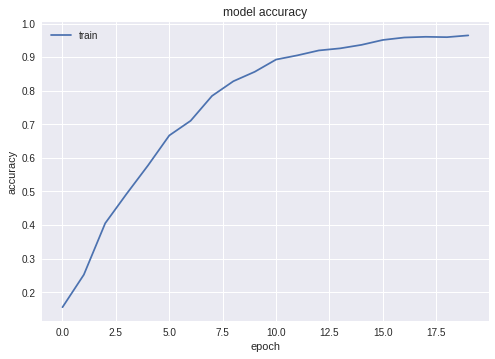

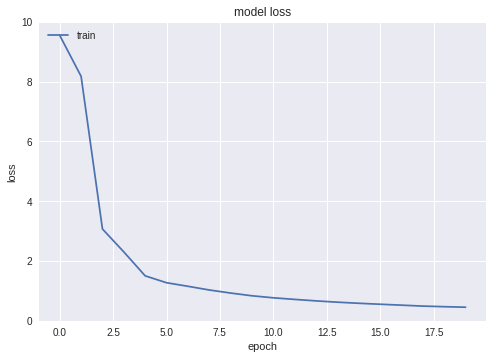

200/200 [==============================] - 1s 4ms/step
Test loss: 2.1273783683776855
Test accuracy: 0.38
(200, 10)
(200,)
[[ 8  3  0  0  4  1  1  1  1  1]
 [ 2  7  2  1  0  2  6  0  0  0]
 [ 2  2 14  0  0  0  1  0  0  1]
 [ 1  3  2  6  0  2  3  2  1  0]
 [ 1  1  0  5  4  3  3  0  2  1]
 [ 0  1  0  1  0 12  3  1  1  1]
 [ 2  2  1  0  0  6  7  1  0  1]
 [ 0  2  3  4  0  1  0  6  3  1]
 [ 0  0  0  1  2  4  3  1  8  1]
 [ 4  2  3  4  0  0  3  0  0  4]]
              precision    recall  f1-score   support

           0       0.40      0.40      0.40        20
           1       0.30      0.35      0.33        20
           2       0.56      0.70      0.62        20
           3       0.27      0.30      0.29        20
           4       0.40      0.20      0.27        20
           5       0.39      0.60      0.47        20
           6       0.23      0.35      0.28        20
           7       0.50      0.30      0.37        20
           8       0.50      0.40      0.44        20
      

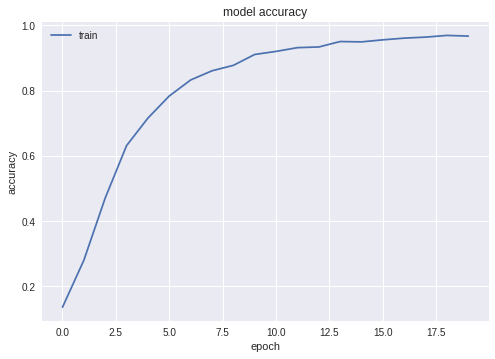

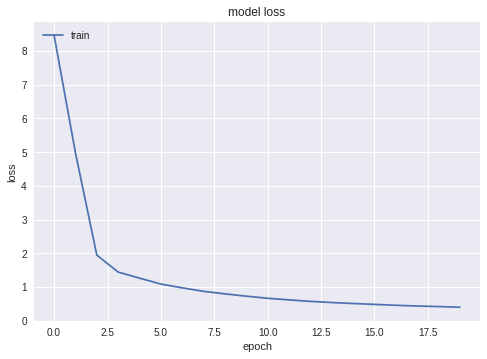

200/200 [==============================] - 1s 4ms/step
Test loss: 1.7630989170074463
Test accuracy: 0.45
(200, 10)
(200,)
[[ 8  1  2  4  1  0  0  3  1  0]
 [ 1  9  1  3  1  1  3  1  0  0]
 [ 1  2 13  1  1  0  1  1  0  0]
 [ 0  2  2 11  1  0  3  1  0  0]
 [ 4  0  0  2  5  5  4  0  0  0]
 [ 0  0  0  2  0 14  2  1  0  1]
 [ 3  1  1  0  2  0 10  3  0  0]
 [ 0  0  3  9  1  1  0  6  0  0]
 [ 0  0  0  2  1  0  7  0 10  0]
 [ 3  1  4  2  1  3  1  0  1  4]]
              precision    recall  f1-score   support

           0       0.40      0.40      0.40        20
           1       0.56      0.45      0.50        20
           2       0.50      0.65      0.57        20
           3       0.31      0.55      0.39        20
           4       0.36      0.25      0.29        20
           5       0.58      0.70      0.64        20
           6       0.32      0.50      0.39        20
           7       0.38      0.30      0.33        20
           8       0.83      0.50      0.62        20
      

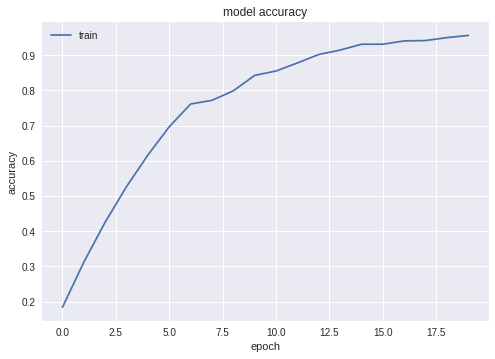

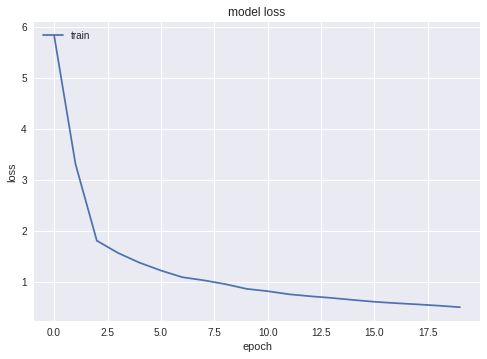

200/200 [==============================] - 1s 4ms/step
Test loss: 1.958654761314392
Test accuracy: 0.39
(200, 10)
(200,)
[[12  0  0  1  0  1  2  2  2  0]
 [ 2  7  2  3  0  1  4  1  0  0]
 [ 8  1 10  0  0  0  1  0  0  0]
 [ 2  2  1  8  1  1  4  1  0  0]
 [ 1  2  0  1  7  2  5  0  0  2]
 [ 0  0  0  1  2  5 10  0  0  2]
 [ 4  1  1  1  0  2  9  1  0  1]
 [ 1  2  2  5  1  0  1  5  2  1]
 [ 0  0  0  2  0  5  4  0  8  1]
 [ 5  0  4  1  0  2  0  0  1  7]]
              precision    recall  f1-score   support

           0       0.34      0.60      0.44        20
           1       0.47      0.35      0.40        20
           2       0.50      0.50      0.50        20
           3       0.35      0.40      0.37        20
           4       0.64      0.35      0.45        20
           5       0.26      0.25      0.26        20
           6       0.23      0.45      0.30        20
           7       0.50      0.25      0.33        20
           8       0.62      0.40      0.48        20
       

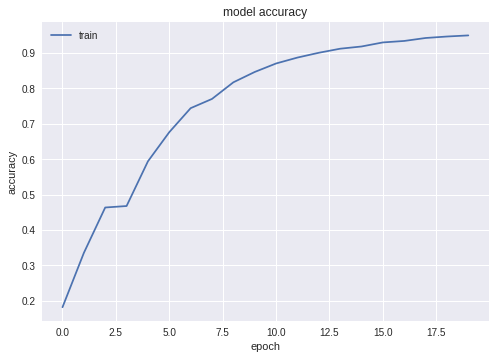

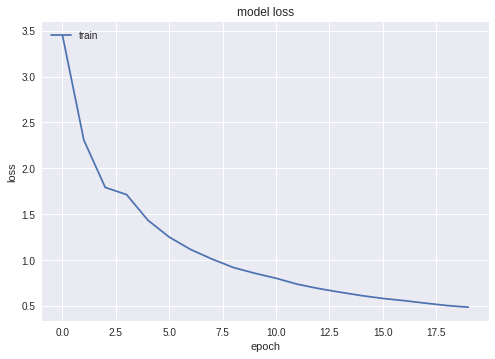

200/200 [==============================] - 1s 3ms/step
Test loss: 1.8507146501541138
Test accuracy: 0.455
(200, 10)
(200,)
[[ 9  2  1  1  1  1  1  2  0  2]
 [ 0  8  0  4  4  1  3  0  0  0]
 [ 1  2 14  1  0  0  1  0  0  1]
 [ 0  4  3  6  1  0  4  2  0  0]
 [ 3  0  0  2  8  5  0  1  0  1]
 [ 0  0  0  2  1 10  5  0  0  2]
 [ 3  1  1  0  1  0  8  2  2  2]
 [ 1  3  2  3  0  0  1  9  1  0]
 [ 0  0  0  1  0  5  3  0 10  1]
 [ 2  0  6  0  0  2  0  1  0  9]]
              precision    recall  f1-score   support

           0       0.47      0.45      0.46        20
           1       0.40      0.40      0.40        20
           2       0.52      0.70      0.60        20
           3       0.30      0.30      0.30        20
           4       0.50      0.40      0.44        20
           5       0.42      0.50      0.45        20
           6       0.31      0.40      0.35        20
           7       0.53      0.45      0.49        20
           8       0.77      0.50      0.61        20
     

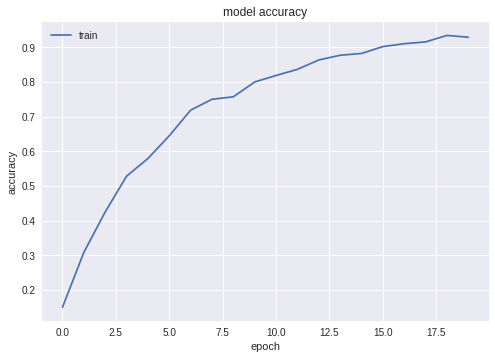

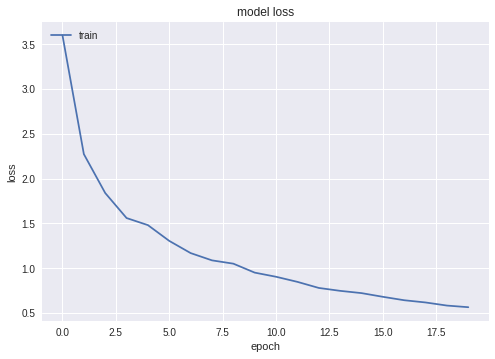

200/200 [==============================] - 1s 4ms/step
Test loss: 1.7430511760711669
Test accuracy: 0.435
(200, 10)
(200,)
[[10  1  0  1  2  2  1  1  1  1]
 [ 2  6  1  6  2  0  3  0  0  0]
 [ 3  2 13  0  1  0  1  0  0  0]
 [ 1  1  4  8  1  0  2  2  1  0]
 [ 1  0  0  2  8  3  3  0  3  0]
 [ 0  0  0  0  1 12  4  1  0  2]
 [ 0  1  1  0  1  3 10  1  2  1]
 [ 0  1  4  5  0  0  0  7  3  0]
 [ 0  0  0  0  3  2  5  0 10  0]
 [ 5  0  5  1  0  3  0  1  2  3]]
              precision    recall  f1-score   support

           0       0.45      0.50      0.48        20
           1       0.50      0.30      0.37        20
           2       0.46      0.65      0.54        20
           3       0.35      0.40      0.37        20
           4       0.42      0.40      0.41        20
           5       0.48      0.60      0.53        20
           6       0.34      0.50      0.41        20
           7       0.54      0.35      0.42        20
           8       0.45      0.50      0.48        20
     

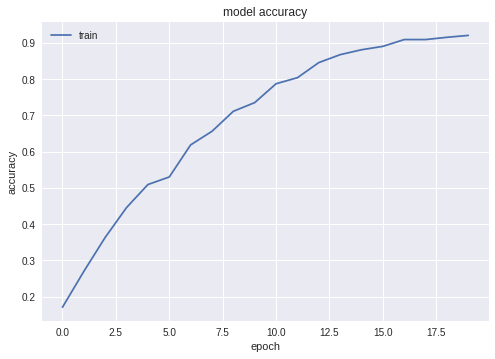

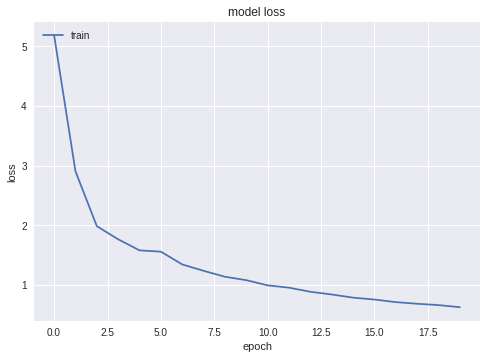

200/200 [==============================] - 1s 4ms/step
Test loss: 2.015365037918091
Test accuracy: 0.36
(200, 10)
(200,)
[[ 3  7  1  0  3  1  1  3  0  1]
 [ 0 16  0  1  0  0  2  0  1  0]
 [ 1  7 12  0  0  0  0  0  0  0]
 [ 0  8  2  4  0  0  3  2  1  0]
 [ 0  3  1  0  8  1  5  0  1  1]
 [ 0  0  0  1  1  4 12  1  0  1]
 [ 0  4  2  1  3  0  8  1  1  0]
 [ 0  4  2  2  0  1  2  9  0  0]
 [ 0  1  0  4  1  0  6  1  7  0]
 [ 1  7  8  1  2  0  0  0  0  1]]
              precision    recall  f1-score   support

           0       0.60      0.15      0.24        20
           1       0.28      0.80      0.42        20
           2       0.43      0.60      0.50        20
           3       0.29      0.20      0.24        20
           4       0.44      0.40      0.42        20
           5       0.57      0.20      0.30        20
           6       0.21      0.40      0.27        20
           7       0.53      0.45      0.49        20
           8       0.64      0.35      0.45        20
       

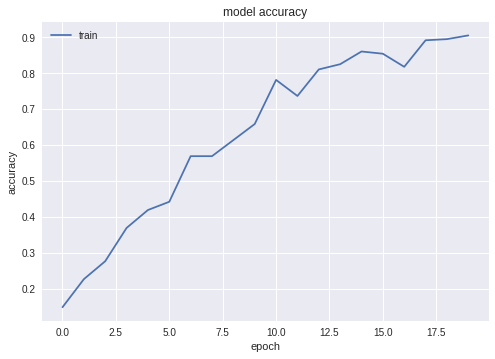

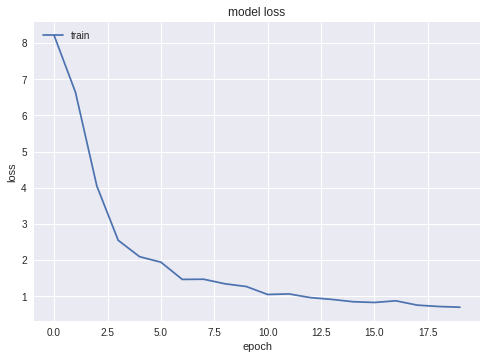

200/200 [==============================] - 1s 4ms/step
Test loss: 2.1036016941070557
Test accuracy: 0.315
(200, 10)
(200,)
[[ 8  2  1  1  1  2  2  2  1  0]
 [ 4  5  0  6  0  2  3  0  0  0]
 [ 5  1  9  1  1  0  1  2  0  0]
 [ 5  5  1  5  1  1  2  0  0  0]
 [ 2  2  0  3  3  7  1  1  0  1]
 [ 0  1  0  0  0 12  6  1  0  0]
 [ 6  1  0  2  0  3  6  2  0  0]
 [ 2  1  1  3  0  3  0  9  1  0]
 [ 0  0  0  3  0  8  2  1  6  0]
 [ 8  1  4  4  0  3  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.20      0.40      0.27        20
           1       0.26      0.25      0.26        20
           2       0.56      0.45      0.50        20
           3       0.18      0.25      0.21        20
           4       0.50      0.15      0.23        20
           5       0.29      0.60      0.39        20
           6       0.26      0.30      0.28        20
           7       0.50      0.45      0.47        20
           8       0.75      0.30      0.43        20
     

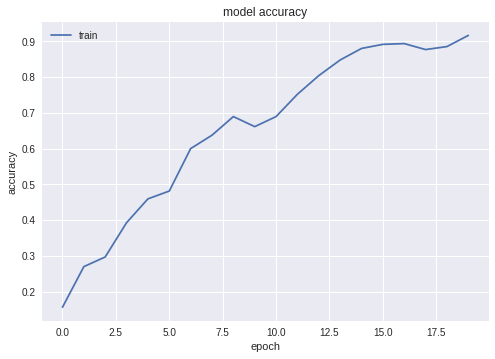

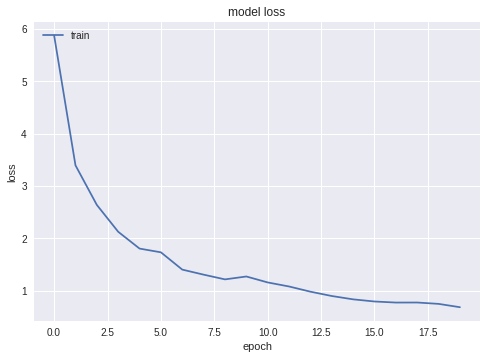

200/200 [==============================] - 1s 4ms/step
Test loss: 2.0497220277786257
Test accuracy: 0.37
(200, 10)
(200,)
[[ 9  1  2  1  2  1  2  1  1  0]
 [ 3  7  0  2  1  3  3  0  0  1]
 [ 4  2 11  1  1  0  1  0  0  0]
 [ 3  1  2  7  1  1  2  1  2  0]
 [ 1  1  0  4 11  0  3  0  0  0]
 [ 0  0  0  1  1  5 11  0  1  1]
 [ 2  3  2  1  0  3  5  2  1  1]
 [ 2  1  1  1  2  2  0  7  3  1]
 [ 1  0  0  2  0  3  6  0  8  0]
 [ 5  0  4  0  2  4  0  0  1  4]]
              precision    recall  f1-score   support

           0       0.30      0.45      0.36        20
           1       0.44      0.35      0.39        20
           2       0.50      0.55      0.52        20
           3       0.35      0.35      0.35        20
           4       0.52      0.55      0.54        20
           5       0.23      0.25      0.24        20
           6       0.15      0.25      0.19        20
           7       0.64      0.35      0.45        20
           8       0.47      0.40      0.43        20
      

In [0]:
m = 1
while(m <= 1):
  model = Sequential()
  model.add(Conv1D(32, kernel_size=(10), activation='relu', data_format="channels_last"))
  model.add(Conv1D(32, kernel_size=(3), activation='relu', data_format="channels_last"))
  model.add(MaxPooling1D(pool_size=(3)))
  model.add(Conv1D(64, kernel_size=(5), activation='relu', data_format="channels_last"))
  model.add(MaxPooling1D(pool_size=(3)))
  model.add(Conv1D(64, kernel_size=(1), activation='relu', data_format="channels_last"))
  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))
  model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=optimizers.SGD(lr=0.001, momentum=m, decay=0.0005),
                metrics=['accuracy'])

  history = model.fit(train_x, train_y,batch_size=100,epochs=20,verbose=2,validation_data=(val_x,val_y))
  model.summary()
  print("Model Created") 

  #plotting training
  plt.plot(history.history['acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

  #testing
  score = model.evaluate(test_x, test_y, verbose=1)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])

  pred_y = model.predict(test_x)
  print(pred_y.shape)
  predy = np.argmax(pred_y, axis=1).T
  print(predy.shape)
  print(confusion_matrix(testy[0:200], predy))
  print(classification_report(testy[0:200], predy))
  m = m - 0.1
  print("m: ",m)

- Paper 3 struc
- Val data was chosen randomly
- test data is void of noise data
- accuracy for different momentums was tested and m = 0.9 gave the best accuracy

In [0]:
mat_contents = sio.loadmat('augtestx.mat')
testx = np.array(mat_contents['test_x'])
test_x = testx[0:200]

mat_contents = sio.loadmat('augtesty.mat')
testy = np.array(mat_contents['test_y'])
test_y = testy[0:200]

mat_contents = sio.loadmat('augtrainx.mat')
train_x = np.array(mat_contents['train_x'])

mat_contents = sio.loadmat('augtrainy.mat')
trainy = np.array(mat_contents['train_y'])

# binary encode
train_y = OneHotEncoder(sparse=False,categories='auto').fit_transform(trainy)
test_y = OneHotEncoder(sparse=False,categories='auto').fit_transform(test_y)

print("Train_y one hot:", train_y.shape)
print("Test_y one hot:", test_y.shape)

#train_x = train_x.reshape(400,2800,10,1)
#test_x = test_x.reshape(200,2800,10,1)
print(train_x.shape)
print(test_x.shape)
print(val_x.shape)
classes = np.unique(trainy)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
print("loaded data")


Train_y one hot: (1200, 10)
Test_y one hot: (200, 10)
(1200, 2800, 10)
(200, 2800, 10)
(240, 2800, 10)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]
loaded data


- This creates test data without noise
- While using validation data, we train on new people

Train on 960 samples, validate on 240 samples
Epoch 1/20
 - 10s - loss: 3.7730 - acc: 0.2021 - val_loss: 1.7562 - val_acc: 0.5375
Epoch 2/20
 - 9s - loss: 2.0359 - acc: 0.3313 - val_loss: 1.2641 - val_acc: 0.7208
Epoch 3/20
 - 9s - loss: 1.4239 - acc: 0.5469 - val_loss: 0.9845 - val_acc: 0.8500
Epoch 4/20
 - 9s - loss: 1.1044 - acc: 0.6688 - val_loss: 1.0375 - val_acc: 0.8042
Epoch 5/20
 - 9s - loss: 0.7485 - acc: 0.7833 - val_loss: 0.7157 - val_acc: 0.9000
Epoch 6/20
 - 9s - loss: 0.5165 - acc: 0.8646 - val_loss: 0.7686 - val_acc: 0.8833
Epoch 7/20
 - 9s - loss: 0.3789 - acc: 0.9010 - val_loss: 0.6119 - val_acc: 0.9167
Epoch 8/20
 - 9s - loss: 0.3753 - acc: 0.8896 - val_loss: 0.5247 - val_acc: 0.9375
Epoch 9/20
 - 9s - loss: 0.2662 - acc: 0.9500 - val_loss: 0.4221 - val_acc: 0.9458
Epoch 10/20
 - 10s - loss: 0.3282 - acc: 0.9385 - val_loss: 0.5233 - val_acc: 0.9125
Epoch 11/20
 - 9s - loss: 0.4011 - acc: 0.9042 - val_loss: 0.2594 - val_acc: 0.9750
Epoch 12/20
 - 9s - loss: 0.6867 - ac

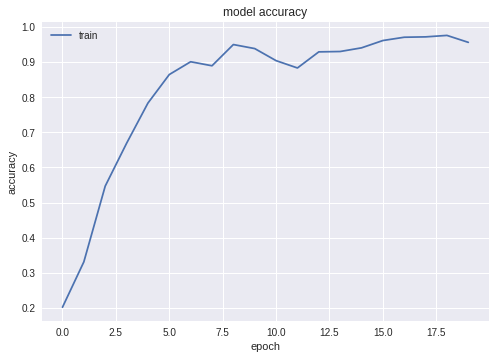

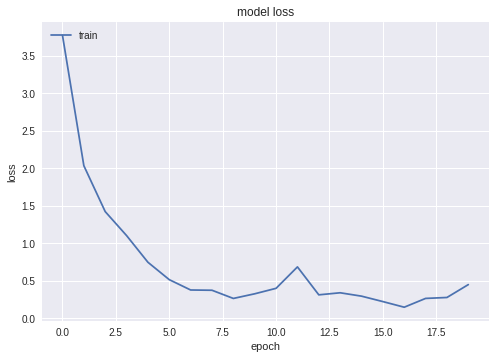

200/200 [==============================] - 1s 3ms/step
Test loss: 5.637811813354492
Test accuracy: 0.635
(200, 10)
(200,)
[[16  0  0  0  1  0  2  0  1  0]
 [ 0 14  1  0  0  0  5  0  0  0]
 [ 0  6 11  0  2  0  1  0  0  0]
 [ 0  5  3  9  0  0  3  0  0  0]
 [ 0  0  0  0 18  0  1  0  1  0]
 [ 1  0  0  0  3  9  0  1  0  6]
 [ 3  0  1  0  1  0  9  1  0  5]
 [ 0  2  3  0  0  0  0 15  0  0]
 [ 4  0  0  0  0  4  0  0 11  1]
 [ 0  0  0  0  1  2  0  0  2 15]]
              precision    recall  f1-score   support

           0       0.67      0.80      0.73        20
           1       0.52      0.70      0.60        20
           2       0.58      0.55      0.56        20
           3       1.00      0.45      0.62        20
           4       0.69      0.90      0.78        20
           5       0.60      0.45      0.51        20
           6       0.43      0.45      0.44        20
           7       0.88      0.75      0.81        20
           8       0.73      0.55      0.63        20
      

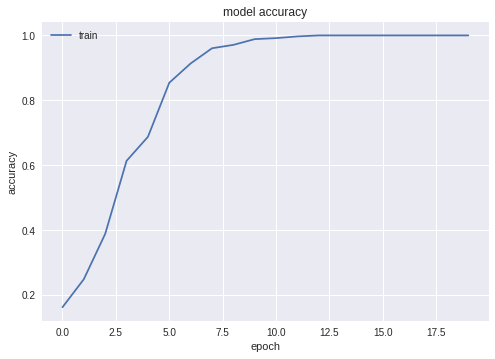

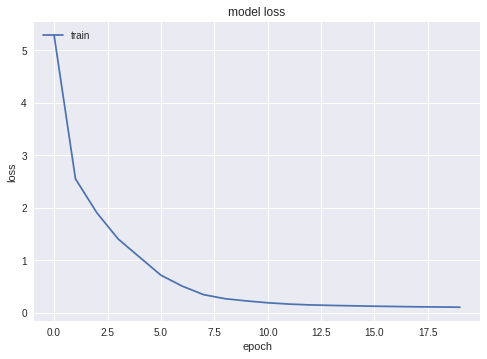

200/200 [==============================] - 1s 3ms/step
Test loss: 1.4281213915348052
Test accuracy: 0.655
(200, 10)
(200,)
[[14  0  0  1  0  2  2  1  0  0]
 [ 1 18  1  0  0  0  0  0  0  0]
 [ 0  2 16  1  0  0  1  0  0  0]
 [ 0  3  2 12  2  0  1  0  0  0]
 [ 4  0  0  2  7  3  4  0  0  0]
 [ 0  0  0  0  0 12  4  1  0  3]
 [ 3  0  2  0  0  2 13  0  0  0]
 [ 3  0  2  3  0  1  1  8  2  0]
 [ 0  0  0  1  0  0  1  0 16  2]
 [ 4  0  0  0  0  0  0  0  1 15]]
              precision    recall  f1-score   support

           0       0.48      0.70      0.57        20
           1       0.78      0.90      0.84        20
           2       0.70      0.80      0.74        20
           3       0.60      0.60      0.60        20
           4       0.78      0.35      0.48        20
           5       0.60      0.60      0.60        20
           6       0.48      0.65      0.55        20
           7       0.80      0.40      0.53        20
           8       0.84      0.80      0.82        20
     

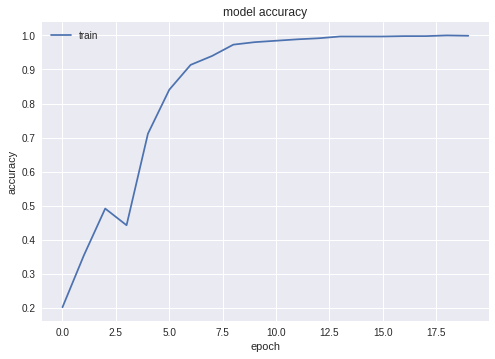

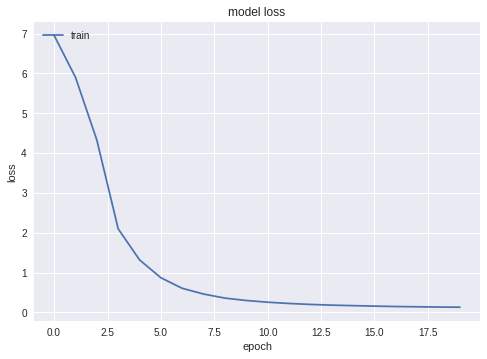

200/200 [==============================] - 1s 3ms/step
Test loss: 1.2396894073486329
Test accuracy: 0.695
(200, 10)
(200,)
[[14  0  0  1  0  1  2  0  1  1]
 [ 1 16  1  0  0  0  2  0  0  0]
 [ 0  1 18  0  0  0  1  0  0  0]
 [ 0  0  1 19  0  0  0  0  0  0]
 [ 0  0  1  2 10  3  3  0  0  1]
 [ 0  0  0  0  1 15  3  0  0  1]
 [ 1  1  1  0  0  4 11  1  0  1]
 [ 0  0  4  6  0  0  0  9  0  1]
 [ 1  0  0  0  0  0  4  0 14  1]
 [ 3  0  2  0  0  1  0  0  1 13]]
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        20
           1       0.89      0.80      0.84        20
           2       0.64      0.90      0.75        20
           3       0.68      0.95      0.79        20
           4       0.91      0.50      0.65        20
           5       0.62      0.75      0.68        20
           6       0.42      0.55      0.48        20
           7       0.90      0.45      0.60        20
           8       0.88      0.70      0.78        20
     

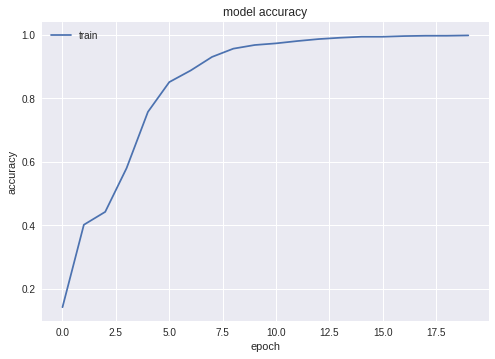

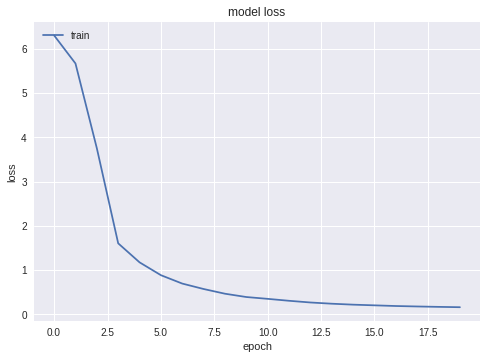

200/200 [==============================] - 1s 3ms/step
Test loss: 1.4076162147521973
Test accuracy: 0.59
(200, 10)
(200,)
[[10  2  2  4  0  0  1  0  0  1]
 [ 1  9  2  4  0  0  4  0  0  0]
 [ 2  2 14  1  0  0  0  0  0  1]
 [ 1  3  1 11  1  1  1  0  1  0]
 [ 1  0  1  1 12  2  0  0  0  3]
 [ 0  0  0  0  1 13  4  1  0  1]
 [ 0  0  1  2  0  0 16  1  0  0]
 [ 0  0  2  6  0  2  1  8  0  1]
 [ 3  3  0  0  0  0  0  0 14  0]
 [ 1  1  7  0  0  0  0  0  0 11]]
              precision    recall  f1-score   support

           0       0.53      0.50      0.51        20
           1       0.45      0.45      0.45        20
           2       0.47      0.70      0.56        20
           3       0.38      0.55      0.45        20
           4       0.86      0.60      0.71        20
           5       0.72      0.65      0.68        20
           6       0.59      0.80      0.68        20
           7       0.80      0.40      0.53        20
           8       0.93      0.70      0.80        20
      

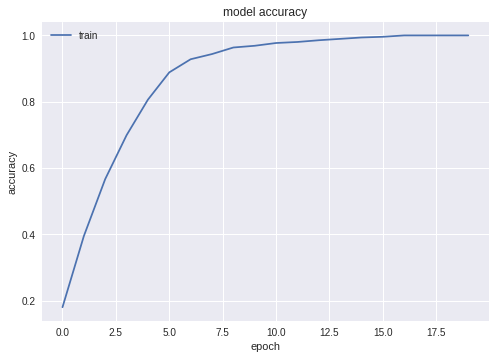

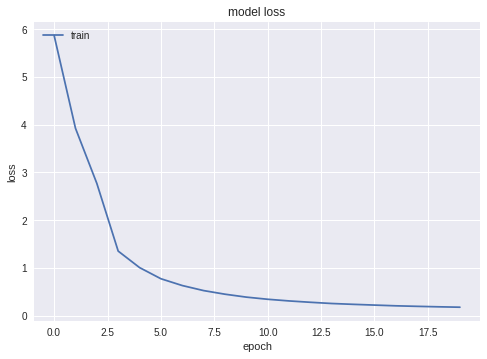

200/200 [==============================] - 1s 3ms/step
Test loss: 1.5041349029541016
Test accuracy: 0.565
(200, 10)
(200,)
[[12  0  0  2  0  3  0  1  0  2]
 [ 3 14  1  0  0  0  2  0  0  0]
 [ 4  2 13  0  0  0  1  0  0  0]
 [ 2  1  2  7  1  2  3  2  0  0]
 [ 0  1  0  0 11  6  0  0  1  1]
 [ 0  0  0  0  0 13  3  0  0  4]
 [ 2  0  1  0  0  1 14  2  0  0]
 [ 1  0  3  4  1  0  0  8  1  2]
 [ 0  3  0  0  2  5  2  0  8  0]
 [ 2  0  2  0  0  2  0  1  0 13]]
              precision    recall  f1-score   support

           0       0.46      0.60      0.52        20
           1       0.67      0.70      0.68        20
           2       0.59      0.65      0.62        20
           3       0.54      0.35      0.42        20
           4       0.73      0.55      0.63        20
           5       0.41      0.65      0.50        20
           6       0.56      0.70      0.62        20
           7       0.57      0.40      0.47        20
           8       0.80      0.40      0.53        20
     

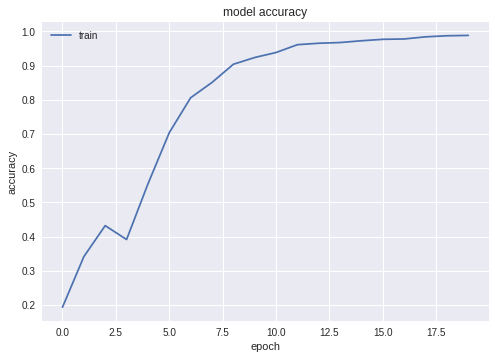

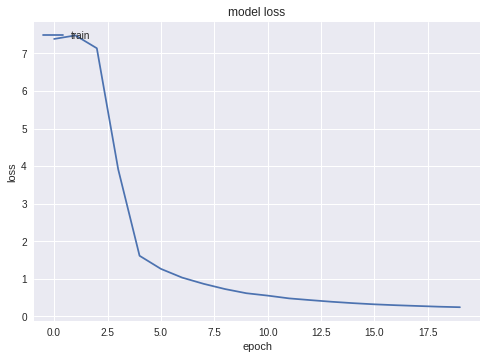

200/200 [==============================] - 1s 3ms/step
Test loss: 1.591558542251587
Test accuracy: 0.56
(200, 10)
(200,)
[[12  2  1  1  0  1  3  0  0  0]
 [ 2 13  0  3  1  0  1  0  0  0]
 [ 1  1 17  0  0  0  1  0  0  0]
 [ 0  3  2 12  0  0  2  0  1  0]
 [ 1  0  0  3 13  0  2  0  1  0]
 [ 0  0  0  0  1 13  4  0  1  1]
 [ 0  1  1  0  0  5  9  1  1  2]
 [ 0  1  2  3  1  1  0  9  3  0]
 [ 0  0  0  6  1  1  2  0  9  1]
 [ 5  0  4  0  0  4  0  0  2  5]]
              precision    recall  f1-score   support

           0       0.57      0.60      0.59        20
           1       0.62      0.65      0.63        20
           2       0.63      0.85      0.72        20
           3       0.43      0.60      0.50        20
           4       0.76      0.65      0.70        20
           5       0.52      0.65      0.58        20
           6       0.38      0.45      0.41        20
           7       0.90      0.45      0.60        20
           8       0.50      0.45      0.47        20
       

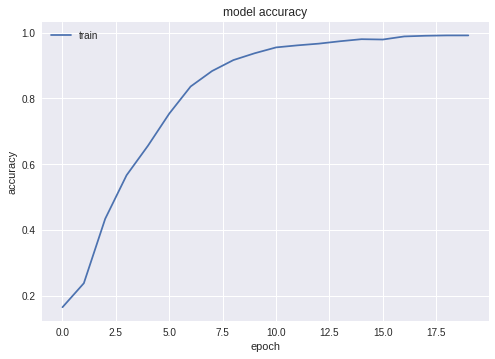

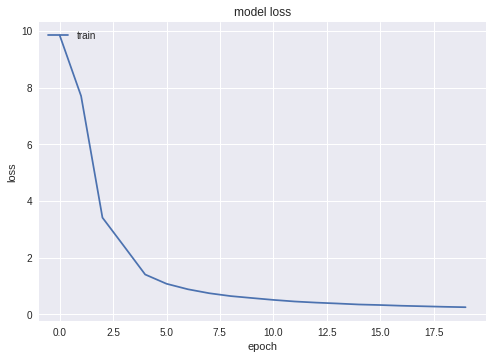

200/200 [==============================] - 1s 3ms/step
Test loss: 1.6373591756820678
Test accuracy: 0.51
(200, 10)
(200,)
[[13  0  0  0  1  1  2  2  0  1]
 [ 0 11  2  2  0  2  3  0  0  0]
 [ 1  0 18  0  0  0  1  0  0  0]
 [ 0  3  1 11  1  1  2  1  0  0]
 [ 1  0  0  3  7  3  3  0  0  3]
 [ 0  0  0  0  2 11  5  1  0  1]
 [ 2  1  1  0  1  7  5  2  0  1]
 [ 0  0  1  5  1  0  0 10  0  3]
 [ 1  1  0  0  1  4  2  0 10  1]
 [ 3  2  7  0  0  2  0  0  0  6]]
              precision    recall  f1-score   support

           0       0.62      0.65      0.63        20
           1       0.61      0.55      0.58        20
           2       0.60      0.90      0.72        20
           3       0.52      0.55      0.54        20
           4       0.50      0.35      0.41        20
           5       0.35      0.55      0.43        20
           6       0.22      0.25      0.23        20
           7       0.62      0.50      0.56        20
           8       1.00      0.50      0.67        20
      

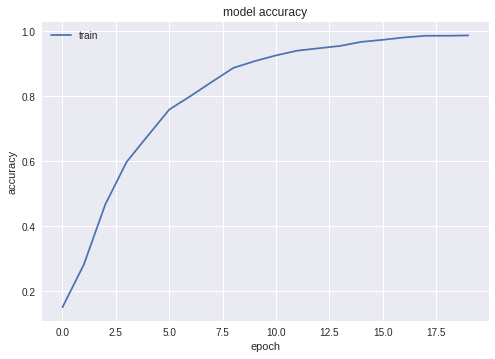

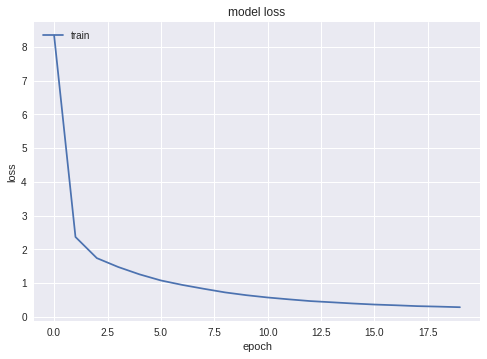

200/200 [==============================] - 1s 3ms/step
Test loss: 1.7640697956085205
Test accuracy: 0.49
(200, 10)
(200,)
[[13  1  1  1  1  1  1  0  0  1]
 [ 2 14  2  0  0  0  2  0  0  0]
 [ 3  1 15  0  0  0  1  0  0  0]
 [ 1  9  1  5  0  0  3  0  1  0]
 [ 2  2  0  2 12  0  2  0  0  0]
 [ 0  0  0  0  1  6  9  1  0  3]
 [ 1  1  2  1  0  4 10  0  0  1]
 [ 0  2  3  1  0  2  0  6  2  4]
 [ 1  1  0  4  0  0  3  0 10  1]
 [ 3  0  5  1  0  1  3  0  0  7]]
              precision    recall  f1-score   support

           0       0.50      0.65      0.57        20
           1       0.45      0.70      0.55        20
           2       0.52      0.75      0.61        20
           3       0.33      0.25      0.29        20
           4       0.86      0.60      0.71        20
           5       0.43      0.30      0.35        20
           6       0.29      0.50      0.37        20
           7       0.86      0.30      0.44        20
           8       0.77      0.50      0.61        20
      

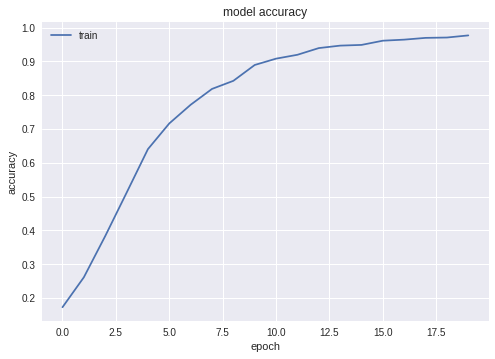

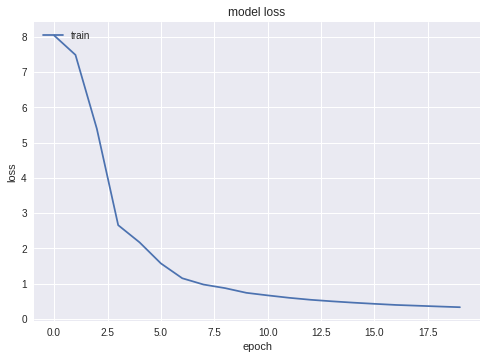

200/200 [==============================] - 1s 4ms/step
Test loss: 1.597820644378662
Test accuracy: 0.52
(200, 10)
(200,)
[[10  0  1  1  2  0  2  0  3  1]
 [ 0 13  2  3  0  0  2  0  0  0]
 [ 3  1 14  0  0  0  1  0  0  1]
 [ 1  1  4 10  0  0  3  0  1  0]
 [ 1  1  1  0  8  5  4  0  0  0]
 [ 0  0  0  2  0 13  5  0  0  0]
 [ 1  1  0  2  0  4  8  1  0  3]
 [ 1  0  2  4  0  2  0 11  0  0]
 [ 1  0  0  0  0  2  4  0 12  1]
 [ 7  0  2  0  0  4  1  0  1  5]]
              precision    recall  f1-score   support

           0       0.40      0.50      0.44        20
           1       0.76      0.65      0.70        20
           2       0.54      0.70      0.61        20
           3       0.45      0.50      0.48        20
           4       0.80      0.40      0.53        20
           5       0.43      0.65      0.52        20
           6       0.27      0.40      0.32        20
           7       0.92      0.55      0.69        20
           8       0.71      0.60      0.65        20
       

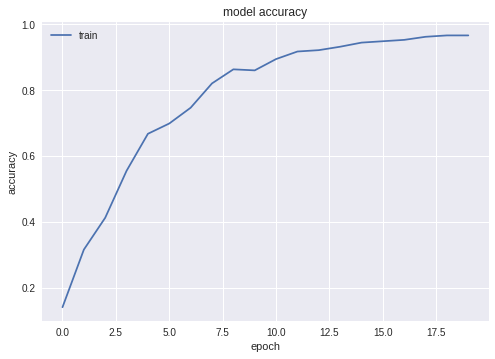

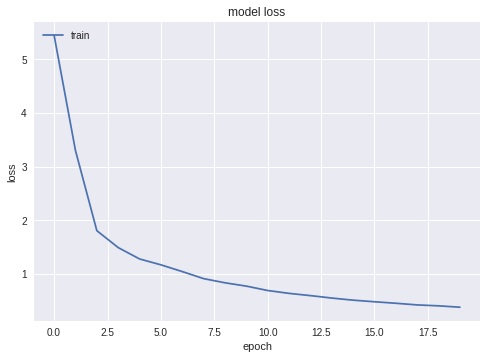

200/200 [==============================] - 1s 3ms/step
Test loss: 1.7927202224731444
Test accuracy: 0.435
(200, 10)
(200,)
[[13  1  0  0  0  1  2  0  2  1]
 [ 2 12  0  2  0  1  2  0  1  0]
 [ 4  1 11  1  0  0  1  0  0  2]
 [ 1  4  3  9  1  0  2  0  0  0]
 [ 0  2  0  4  6  4  3  0  0  1]
 [ 0  0  0  3  0  9  6  0  0  2]
 [ 1  5  1  0  2  4  3  0  2  2]
 [ 0  1  3  5  0  1  0  8  1  1]
 [ 1  0  0  3  0  2  4  0 10  0]
 [ 1  1  6  2  1  2  0  0  1  6]]
              precision    recall  f1-score   support

           0       0.57      0.65      0.60        20
           1       0.44      0.60      0.51        20
           2       0.46      0.55      0.50        20
           3       0.31      0.45      0.37        20
           4       0.60      0.30      0.40        20
           5       0.38      0.45      0.41        20
           6       0.13      0.15      0.14        20
           7       1.00      0.40      0.57        20
           8       0.59      0.50      0.54        20
     

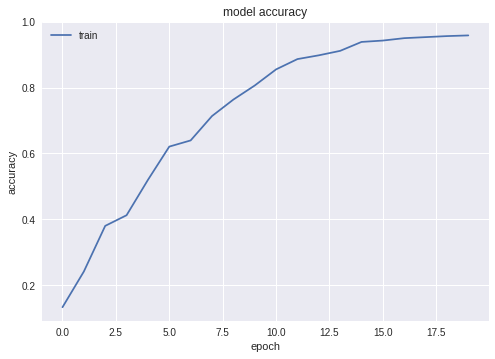

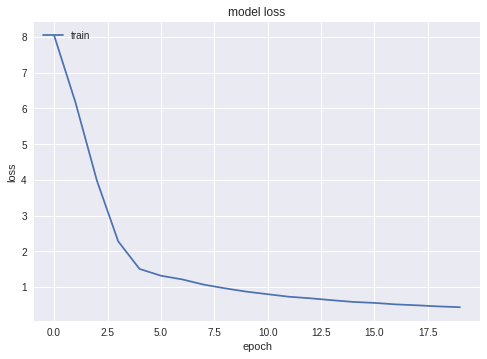

200/200 [==============================] - 1s 3ms/step
Test loss: 1.8533042907714843
Test accuracy: 0.44
(200, 10)
(200,)
[[ 8  1  2  0  2  3  2  1  1  0]
 [ 2  7  3  2  0  3  3  0  0  0]
 [ 1  2 15  1  0  0  1  0  0  0]
 [ 0  3  1 10  0  1  3  2  0  0]
 [ 0  0  1  2 13  3  1  0  0  0]
 [ 0  1  0  2  3  5  9  0  0  0]
 [ 1  2  2  3  2  1  7  2  0  0]
 [ 1  0  2  5  2  0  1  7  1  1]
 [ 0  0  0  1  1  3  3  0 10  2]
 [ 5  1  3  2  1  0  0  0  2  6]]
              precision    recall  f1-score   support

           0       0.44      0.40      0.42        20
           1       0.41      0.35      0.38        20
           2       0.52      0.75      0.61        20
           3       0.36      0.50      0.42        20
           4       0.54      0.65      0.59        20
           5       0.26      0.25      0.26        20
           6       0.23      0.35      0.28        20
           7       0.58      0.35      0.44        20
           8       0.71      0.50      0.59        20
      

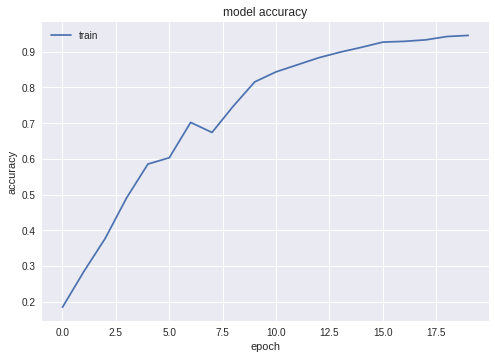

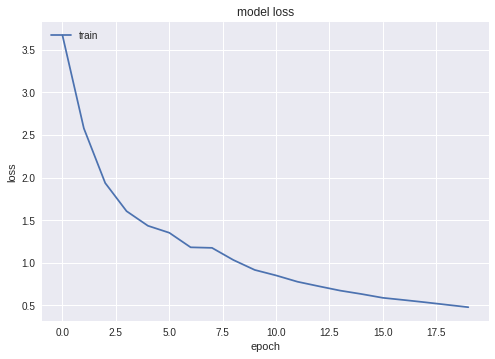

200/200 [==============================] - 1s 4ms/step
Test loss: 1.8590900993347168
Test accuracy: 0.4
(200, 10)
(200,)
[[12  0  0  1  0  2  2  2  0  1]
 [ 1  7  0  4  3  0  3  1  1  0]
 [ 6  1 11  1  0  0  1  0  0  0]
 [ 3  1  1 12  1  0  1  0  1  0]
 [ 6  1  0  2  5  3  1  0  0  2]
 [ 1  0  0  5  1  7  3  0  0  3]
 [ 5  1  1  1  0  1  7  0  3  1]
 [ 0  0  4  7  0  0  0  7  1  1]
 [ 2  0  0  3  0  4  1  0 10  0]
 [ 6  0  4  6  0  1  0  0  1  2]]
              precision    recall  f1-score   support

           0       0.29      0.60      0.39        20
           1       0.64      0.35      0.45        20
           2       0.52      0.55      0.54        20
           3       0.29      0.60      0.39        20
           4       0.50      0.25      0.33        20
           5       0.39      0.35      0.37        20
           6       0.37      0.35      0.36        20
           7       0.70      0.35      0.47        20
           8       0.59      0.50      0.54        20
       

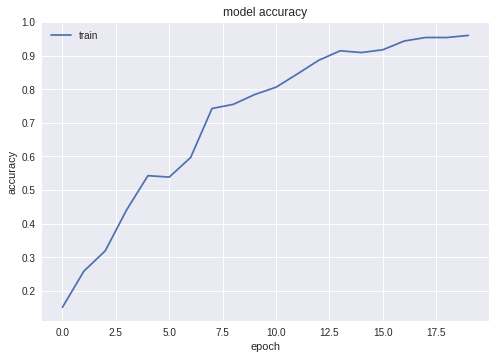

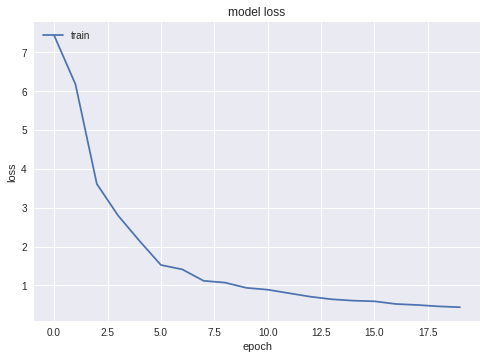

200/200 [==============================] - 1s 3ms/step
Test loss: 1.664246129989624
Test accuracy: 0.495
(200, 10)
(200,)
[[10  1  0  0  1  1  1  1  1  4]
 [ 1 13  1  4  0  0  1  0  0  0]
 [ 3  0 15  1  0  0  1  0  0  0]
 [ 0  1  2 10  1  0  2  1  2  1]
 [ 1  1  0  3  9  2  2  0  1  1]
 [ 0  0  0  1  1  9  6  1  0  2]
 [ 2  2  1  1  2  1  7  1  1  2]
 [ 1  1  2  5  0  1  0  9  1  0]
 [ 1  1  0  1  0  3  2  0 11  1]
 [ 6  0  5  1  0  0  0  0  2  6]]
              precision    recall  f1-score   support

           0       0.40      0.50      0.44        20
           1       0.65      0.65      0.65        20
           2       0.58      0.75      0.65        20
           3       0.37      0.50      0.43        20
           4       0.64      0.45      0.53        20
           5       0.53      0.45      0.49        20
           6       0.32      0.35      0.33        20
           7       0.69      0.45      0.55        20
           8       0.58      0.55      0.56        20
      

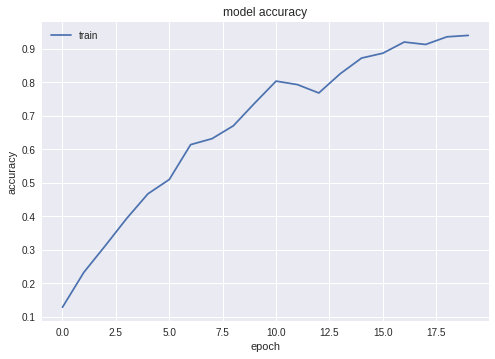

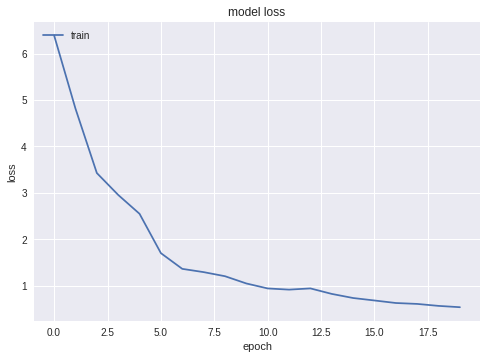

200/200 [==============================] - 1s 3ms/step
Test loss: 1.8046598625183106
Test accuracy: 0.465
(200, 10)
(200,)
[[11  3  0  1  0  1  2  1  1  0]
 [ 1 15  0  2  0  1  1  0  0  0]
 [ 2  2 13  2  0  0  1  0  0  0]
 [ 1  5  1 10  0  0  3  0  0  0]
 [ 1  1  0  1  9  4  4  0  0  0]
 [ 0  0  0  0  2 11  6  1  0  0]
 [ 4  4  1  0  1  3  5  0  2  0]
 [ 2  2  0  4  0  1  0  7  3  1]
 [ 0  0  0  1  0  7  2  0  9  1]
 [ 3  0  6  1  0  4  1  0  2  3]]
              precision    recall  f1-score   support

           0       0.44      0.55      0.49        20
           1       0.47      0.75      0.58        20
           2       0.62      0.65      0.63        20
           3       0.45      0.50      0.48        20
           4       0.75      0.45      0.56        20
           5       0.34      0.55      0.42        20
           6       0.20      0.25      0.22        20
           7       0.78      0.35      0.48        20
           8       0.53      0.45      0.49        20
     

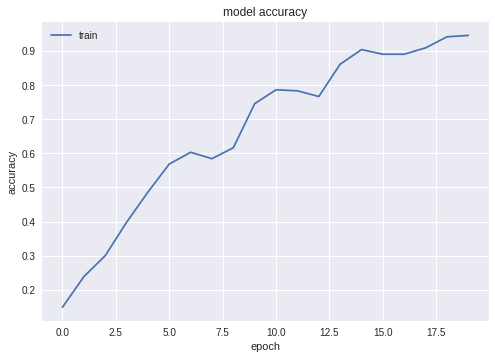

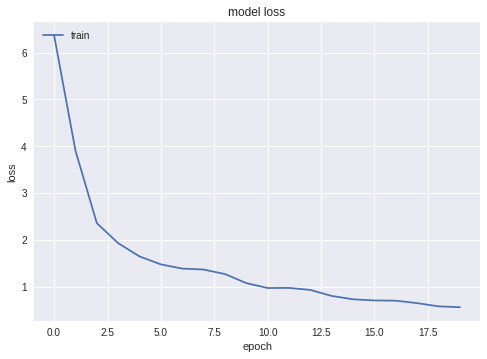

200/200 [==============================] - 1s 3ms/step
Test loss: 1.7917289924621582
Test accuracy: 0.42
(200, 10)
(200,)
[[10  2  2  1  1  1  1  0  1  1]
 [ 1  9  0  4  1  1  1  0  2  1]
 [ 5  2 12  0  0  0  1  0  0  0]
 [ 1  4  2  9  1  1  0  0  2  0]
 [ 0  0  1  1  8  6  2  0  1  1]
 [ 0  0  0  3  1  8  4  1  0  3]
 [ 4  1  2  1  0  1  7  1  1  2]
 [ 1  1  0  1  2  0  1  7  7  0]
 [ 0  0  0  2  1  1  4  0 12  0]
 [ 2  1  7  6  0  0  0  0  2  2]]
              precision    recall  f1-score   support

           0       0.42      0.50      0.45        20
           1       0.45      0.45      0.45        20
           2       0.46      0.60      0.52        20
           3       0.32      0.45      0.38        20
           4       0.53      0.40      0.46        20
           5       0.42      0.40      0.41        20
           6       0.33      0.35      0.34        20
           7       0.78      0.35      0.48        20
           8       0.43      0.60      0.50        20
      

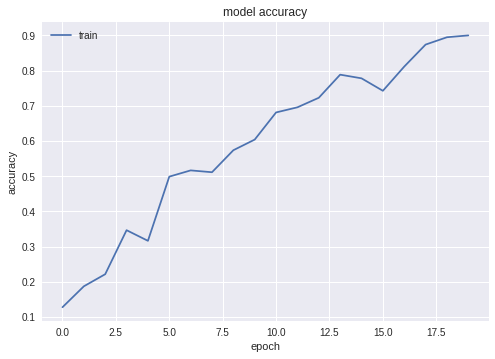

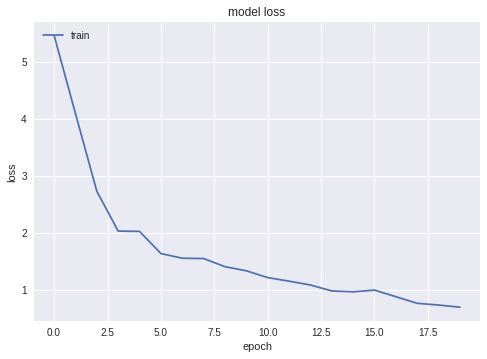

200/200 [==============================] - 1s 3ms/step
Test loss: 1.9966357040405274
Test accuracy: 0.405
(200, 10)
(200,)
[[11  0  0  1  3  1  2  0  2  0]
 [ 3  8  1  5  1  0  2  0  0  0]
 [ 4  0 15  0  0  0  1  0  0  0]
 [ 1  1  3  9  0  1  2  0  3  0]
 [ 2  1  0  2  9  2  4  0  0  0]
 [ 0  0  0  5  0  5  8  0  1  1]
 [ 7  1  1  0  1  1  7  0  2  0]
 [ 2  0  1  3  1  0  1  6  6  0]
 [ 1  0  0  2  0  1  5  1 10  0]
 [ 6  2  3  8  0  0  0  0  0  1]]
              precision    recall  f1-score   support

           0       0.30      0.55      0.39        20
           1       0.62      0.40      0.48        20
           2       0.62      0.75      0.68        20
           3       0.26      0.45      0.33        20
           4       0.60      0.45      0.51        20
           5       0.45      0.25      0.32        20
           6       0.22      0.35      0.27        20
           7       0.86      0.30      0.44        20
           8       0.42      0.50      0.45        20
     

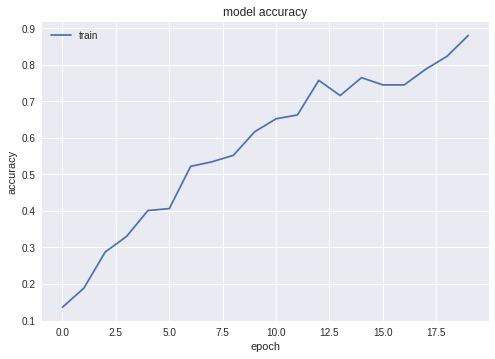

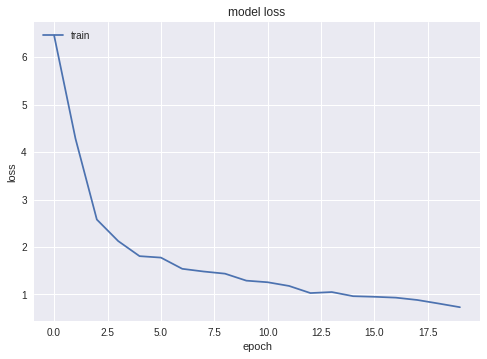

200/200 [==============================] - 1s 3ms/step
Test loss: 1.9060011291503907
Test accuracy: 0.385
(200, 10)
(200,)
[[10  0  3  0  2  0  2  0  3  0]
 [ 5  7  1  2  0  0  4  0  1  0]
 [ 2  4 13  0  0  0  1  0  0  0]
 [ 2  4  3  4  2  0  2  0  3  0]
 [ 2  0  0  1 10  1  4  0  2  0]
 [ 0  0  0  0  1  9  4  0  3  3]
 [ 1  7  1  0  0  0  6  0  4  1]
 [ 1  1  3  1  0  0  0  1 12  1]
 [ 0  0  0  0  0  0  4  0 16  0]
 [ 6  1  5  2  0  0  0  0  5  1]]
              precision    recall  f1-score   support

           0       0.34      0.50      0.41        20
           1       0.29      0.35      0.32        20
           2       0.45      0.65      0.53        20
           3       0.40      0.20      0.27        20
           4       0.67      0.50      0.57        20
           5       0.90      0.45      0.60        20
           6       0.22      0.30      0.26        20
           7       1.00      0.05      0.10        20
           8       0.33      0.80      0.46        20
     

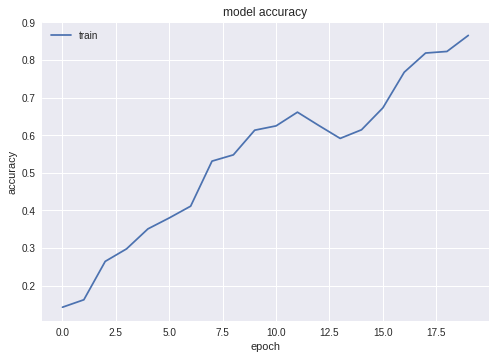

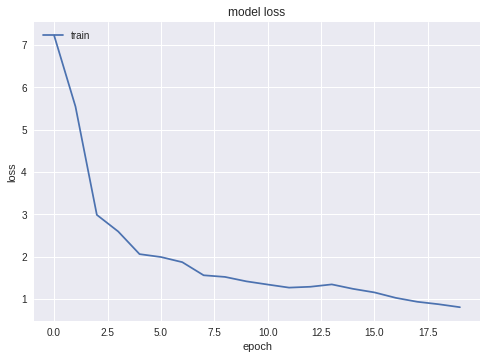

200/200 [==============================] - 1s 3ms/step
Test loss: 1.9322579002380371
Test accuracy: 0.385
(200, 10)
(200,)
[[ 7  1  3  0  3  2  1  2  1  0]
 [ 3  2  5  0  0  3  6  0  1  0]
 [ 7  0 11  1  0  0  1  0  0  0]
 [ 0  0  4 10  2  0  2  0  0  2]
 [ 1  0  0  1 12  2  3  1  0  0]
 [ 0  0  0  1  3  9  6  1  0  0]
 [ 4  0  1  1  1  1  9  1  1  1]
 [ 0  1  1  5  4  1  0  8  0  0]
 [ 0  0  0  3  1  6  5  0  5  0]
 [ 2  0  2  2  1  3  1  3  2  4]]
              precision    recall  f1-score   support

           0       0.29      0.35      0.32        20
           1       0.50      0.10      0.17        20
           2       0.41      0.55      0.47        20
           3       0.42      0.50      0.45        20
           4       0.44      0.60      0.51        20
           5       0.33      0.45      0.38        20
           6       0.26      0.45      0.33        20
           7       0.50      0.40      0.44        20
           8       0.50      0.25      0.33        20
     

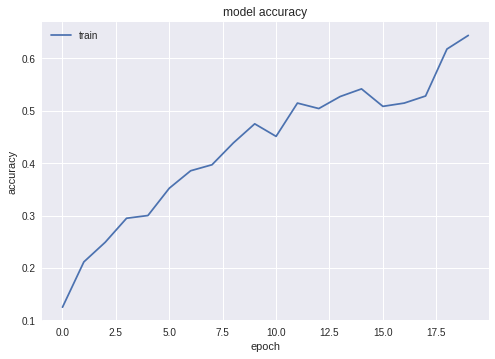

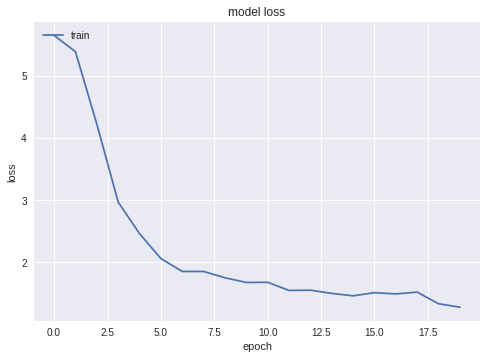

200/200 [==============================] - 1s 3ms/step
Test loss: 1.9635474681854248
Test accuracy: 0.35
(200, 10)
(200,)
[[ 3  0  0  0  8  0  0  7  2  0]
 [ 1  0  0  0  2  1  6  4  6  0]
 [ 0  0  6  0  2  1  0 11  0  0]
 [ 0  0  2  0 10  2  1  5  0  0]
 [ 0  0  0  0 15  3  0  1  1  0]
 [ 0  0  0  0  4 14  0  1  0  1]
 [ 0  0  2  0  6  2  5  3  2  0]
 [ 0  0  0  0  3  1  0 14  2  0]
 [ 0  0  0  0  6  3  1  1  9  0]
 [ 0  0  0  0  7  1  0  6  2  4]]
              precision    recall  f1-score   support

           0       0.75      0.15      0.25        20
           1       0.00      0.00      0.00        20
           2       0.60      0.30      0.40        20
           3       0.00      0.00      0.00        20
           4       0.24      0.75      0.36        20
           5       0.50      0.70      0.58        20
           6       0.38      0.25      0.30        20
           7       0.26      0.70      0.38        20
           8       0.38      0.45      0.41        20
      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Train on 960 samples, validate on 240 samples
Epoch 1/20
 - 11s - loss: 6.9131 - acc: 0.1146 - val_loss: 6.4659 - val_acc: 0.1583
Epoch 2/20
 - 9s - loss: 7.9042 - acc: 0.1344 - val_loss: 7.8873 - val_acc: 0.2500
Epoch 3/20
 - 9s - loss: 6.8723 - acc: 0.1656 - val_loss: 7.4858 - val_acc: 0.0375
Epoch 4/20
 - 9s - loss: 4.7299 - acc: 0.2167 - val_loss: 3.3654 - val_acc: 0.4583
Epoch 5/20
 - 9s - loss: 3.2455 - acc: 0.2240 - val_loss: 2.6080 - val_acc: 0.4667
Epoch 6/20
 - 9s - loss: 2.7708 - acc: 0.3115 - val_loss: 2.6861 - val_acc: 0.3875
Epoch 7/20
 - 9s - loss: 2.4351 - acc: 0.2990 - val_loss: 2.5515 - val_acc: 0.4000
Epoch 8/20
 - 9s - loss: 2.2500 - acc: 0.3250 - val_loss: 2.3605 - val_acc: 0.4625
Epoch 9/20
 - 9s - loss: 1.9464 - acc: 0.3990 - val_loss: 2.1154 - val_acc: 0.4958
Epoch 10/20
 - 9s - loss: 1.8136 - acc: 0.4417 - val_loss: 1.8488 - val_acc: 0.5250
Epoch 11/20
 - 9s - loss: 1.7804 - acc: 0.4271 - val_loss: 1.7588 - val_acc: 0.5208
Epoch 12/20
 - 9s - loss: 1.7046 - acc

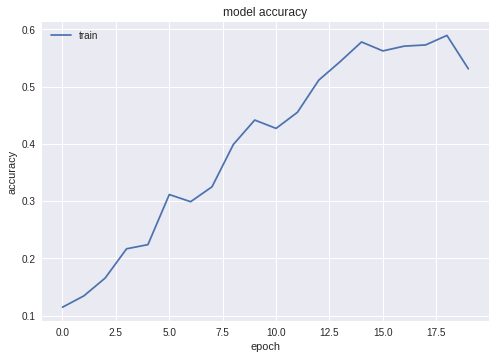

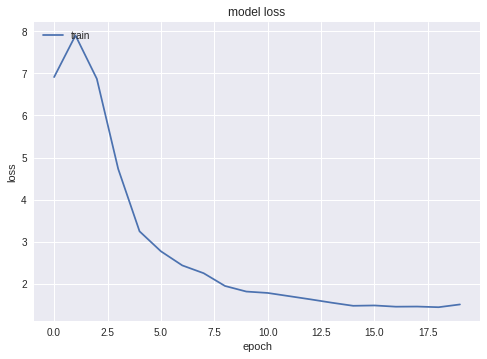

200/200 [==============================] - 1s 3ms/step
Test loss: 2.1165208625793457
Test accuracy: 0.275
(200, 10)
(200,)
[[ 0  0  0  0  3  1  1 12  3  0]
 [ 0  2  0  0  3  3  0  5  7  0]
 [ 1  1  1  0  3  0  0 11  3  0]
 [ 1  0  0  1  8  1  0  1  8  0]
 [ 0  1  0  0 10  2  0  1  6  0]
 [ 0  0  0  0  3 11  1  3  1  1]
 [ 0  0  1  0  0  5  4  8  2  0]
 [ 0  0  0  0  3  0  0 12  5  0]
 [ 0  0  0  0  3  3  0  1 13  0]
 [ 0  0  0  0  1  1  0 12  5  1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.50      0.10      0.17        20
           2       0.50      0.05      0.09        20
           3       1.00      0.05      0.10        20
           4       0.27      0.50      0.35        20
           5       0.41      0.55      0.47        20
           6       0.67      0.20      0.31        20
           7       0.18      0.60      0.28        20
           8       0.25      0.65      0.36        20
     

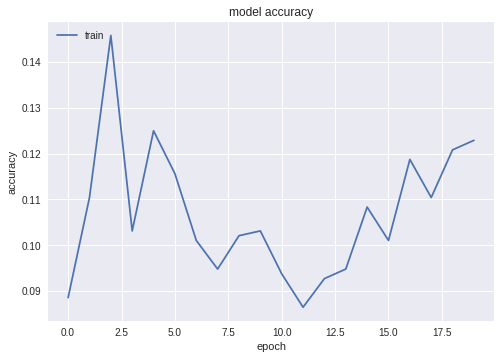

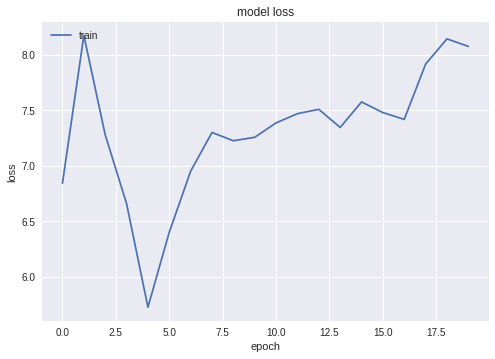

200/200 [==============================] - 1s 3ms/step
Test loss: 6.696600914001465
Test accuracy: 0.1
(200, 10)
(200,)
[[ 0  0  0 12  0  0  0  8  0  0]
 [ 0  0  0 18  0  0  0  2  0  0]
 [ 0  0  0 17  0  0  0  3  0  0]
 [ 0  0  0 16  0  0  0  4  0  0]
 [ 0  0  0 12  0  0  0  8  0  0]
 [ 0  0  0 13  0  0  0  7  0  0]
 [ 0  0  0 16  0  0  0  4  0  0]
 [ 0  0  0 16  0  0  0  4  0  0]
 [ 0  0  0 17  0  0  0  3  0  0]
 [ 0  0  0 18  0  0  0  2  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        20
           3       0.10      0.80      0.18        20
           4       0.00      0.00      0.00        20
           5       0.00      0.00      0.00        20
           6       0.00      0.00      0.00        20
           7       0.09      0.20      0.12        20
           8       0.00      0.00      0.00        20
        

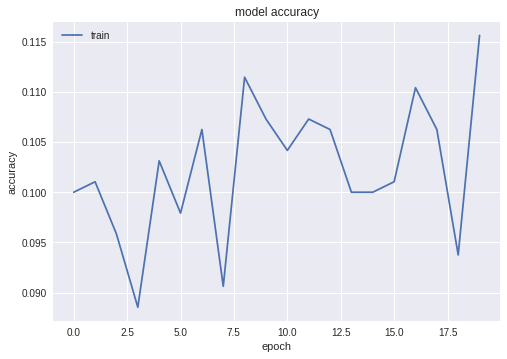

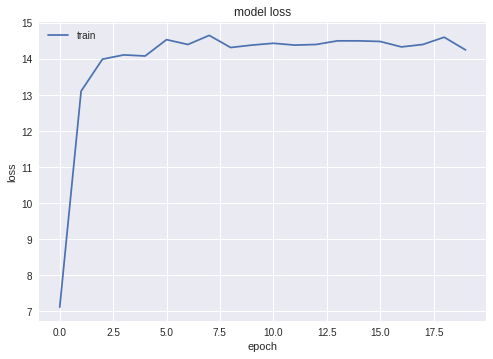

200/200 [==============================] - 1s 3ms/step
Test loss: 14.506285858154296
Test accuracy: 0.1
(200, 10)
(200,)
[[ 0  0  0  0  0  0 20  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        20
           5       0.00      0.00      0.00        20
           6       0.10      1.00      0.18        20
           7       0.00      0.00      0.00        20
           8       0.00      0.00      0.00        20
       

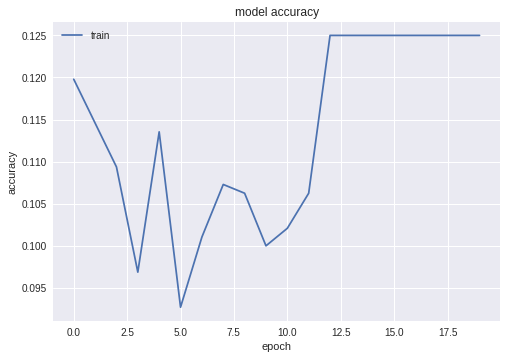

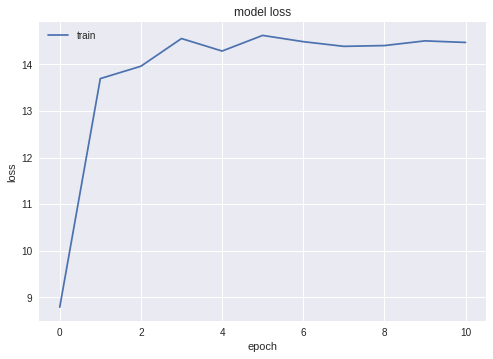

200/200 [==============================] - 1s 3ms/step
Test loss: nan
Test accuracy: 0.1
(200, 10)
(200,)
[[20  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.10      1.00      0.18        20
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        20
           5       0.00      0.00      0.00        20
           6       0.00      0.00      0.00        20
           7       0.00      0.00      0.00        20
           8       0.00      0.00      0.00        20
           9       0.0

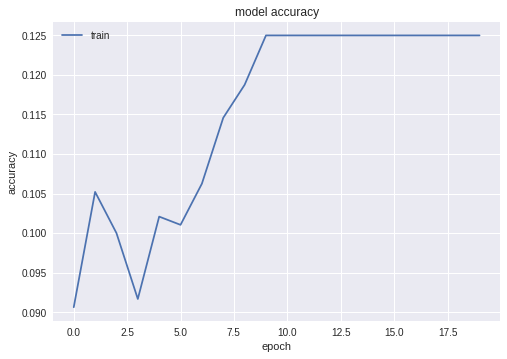

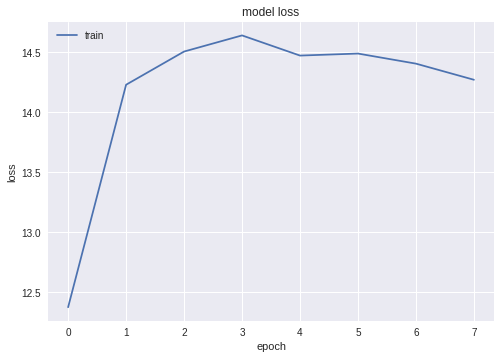

200/200 [==============================] - 1s 3ms/step
Test loss: nan
Test accuracy: 0.1
(200, 10)
(200,)
[[20  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.10      1.00      0.18        20
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        20
           5       0.00      0.00      0.00        20
           6       0.00      0.00      0.00        20
           7       0.00      0.00      0.00        20
           8       0.00      0.00      0.00        20
           9       0.0

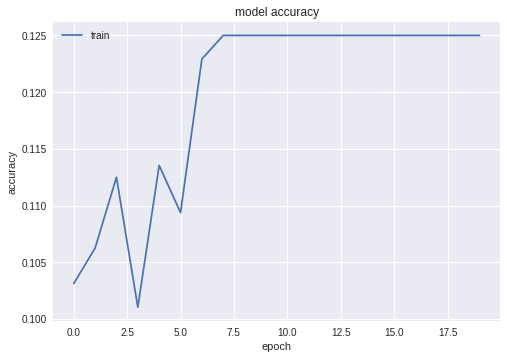

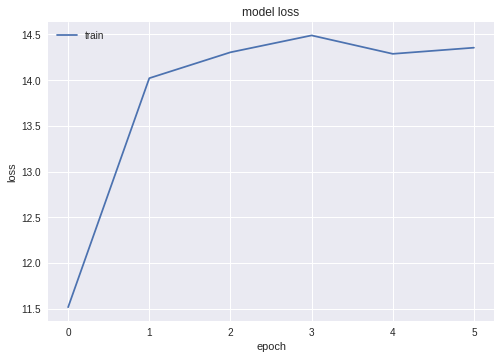

200/200 [==============================] - 1s 3ms/step
Test loss: nan
Test accuracy: 0.1
(200, 10)
(200,)
[[20  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.10      1.00      0.18        20
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        20
           5       0.00      0.00      0.00        20
           6       0.00      0.00      0.00        20
           7       0.00      0.00      0.00        20
           8       0.00      0.00      0.00        20
           9       0.0

KeyboardInterrupt: ignored

In [0]:
m = 1
while(m <= 1):
  model = Sequential()
  model.add(Conv1D(32, kernel_size=(10), activation='relu', data_format="channels_last"))
  model.add(Conv1D(32, kernel_size=(3), activation='relu', data_format="channels_last"))
  model.add(MaxPooling1D(pool_size=(3)))
  model.add(Conv1D(64, kernel_size=(5), activation='relu', data_format="channels_last"))
  model.add(MaxPooling1D(pool_size=(3)))
  model.add(Conv1D(64, kernel_size=(1), activation='relu', data_format="channels_last"))
  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))
  model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=optimizers.SGD(lr=0.001, momentum=m, decay=0.0005),
                metrics=['accuracy'])

  history = model.fit(train_x, train_y,batch_size=100,epochs=20,verbose=2,validation_split=0.2)
  model.summary()
  print("Model Created") 

  #plotting training
  plt.plot(history.history['acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

  #testing
  score = model.evaluate(test_x, test_y, verbose=1)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])

  pred_y = model.predict(test_x)
  print(pred_y.shape)
  predy = np.argmax(pred_y, axis=1).T
  print(predy.shape)
  print(confusion_matrix(testy[0:200], predy))
  print(classification_report(testy[0:200], predy))
  m = m - 0.1
  print("m: ",m)

- Paper 3 struc
- Val data was chosen from the last 2 people
- test data is void of noise data
- momentum was tested and m = 0.8 gave highest accuracy

In [0]:
mat_contents = sio.loadmat('augtestx.mat')
test_x = np.array(mat_contents['test_x'])
#test_x = testx[0:200]

mat_contents = sio.loadmat('augtesty.mat')
testy = np.array(mat_contents['test_y'])
#test_y = testy[0:200]

mat_contents = sio.loadmat('augtrainx.mat')
train_x = np.array(mat_contents['train_x'])

mat_contents = sio.loadmat('augtrainy.mat')
trainy = np.array(mat_contents['train_y'])

# binary encode
train_y = OneHotEncoder(sparse=False,categories='auto').fit_transform(trainy)
test_y = OneHotEncoder(sparse=False,categories='auto').fit_transform(testy)

print("Train_y one hot:", train_y.shape)
print("Test_y one hot:", test_y.shape)

#train_x = train_x.reshape(400,2800,10,1)
#test_x = test_x.reshape(200,2800,10,1)
print(train_x.shape)
print(test_x.shape)

classes = np.unique(trainy)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
print("loaded data")


Train_y one hot: (1200, 10)
Test_y one hot: (600, 10)
(1200, 2800, 10)
(600, 2800, 10)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]
loaded data


- This creates test data with noise
- While using validation data, we train on new people

Train on 960 samples, validate on 240 samples
Epoch 1/100
 - 12s - loss: 6.5454 - acc: 0.1281 - val_loss: 4.2443 - val_acc: 0.0042
Epoch 2/100
 - 9s - loss: 2.2941 - acc: 0.2625 - val_loss: 1.8756 - val_acc: 0.5167
Epoch 3/100
 - 9s - loss: 1.6489 - acc: 0.5552 - val_loss: 1.4060 - val_acc: 0.7417
Epoch 4/100
 - 9s - loss: 1.2207 - acc: 0.7229 - val_loss: 1.0016 - val_acc: 0.8375
Epoch 5/100
 - 9s - loss: 0.9207 - acc: 0.8125 - val_loss: 0.9494 - val_acc: 0.8458
Epoch 6/100
 - 9s - loss: 0.6726 - acc: 0.9052 - val_loss: 0.7454 - val_acc: 0.9250
Epoch 7/100
 - 9s - loss: 0.5397 - acc: 0.9406 - val_loss: 0.6217 - val_acc: 0.9500
Epoch 8/100
 - 9s - loss: 0.4174 - acc: 0.9542 - val_loss: 0.5952 - val_acc: 0.9625
Epoch 9/100
 - 9s - loss: 0.3438 - acc: 0.9698 - val_loss: 0.5255 - val_acc: 0.9750
Epoch 10/100
 - 10s - loss: 0.2855 - acc: 0.9833 - val_loss: 0.4986 - val_acc: 0.9792
Epoch 11/100
 - 9s - loss: 0.2428 - acc: 0.9896 - val_loss: 0.4969 - val_acc: 0.9833
Epoch 12/100
 - 9s - loss:

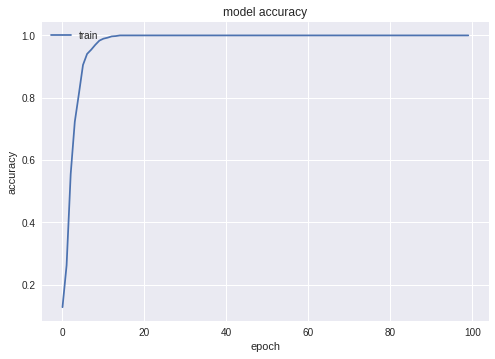

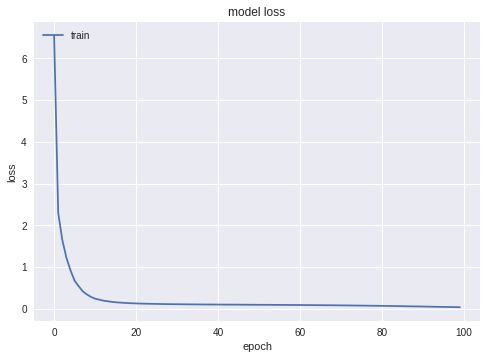

600/600 [==============================] - 2s 3ms/step
Test loss: 2.084236160914103
Test accuracy: 0.2883333325386047
(600, 10)
[[13  0  0  0  2  0  2  0  2 41]
 [ 0 17  1  0  0  0  2  0  0 40]
 [ 1  0 16  1  0  0  2  0  0 40]
 [ 0  1  3 12  0  0  3  1  0 40]
 [ 1  0  0  2 11  2  4  0  0 40]
 [ 0  0  0  1  0 12  6  1  0 40]
 [ 2  0  1  1  0  2 12  0  1 41]
 [ 0  0  4  7  1  0  1  7  0 40]
 [ 1  0  0  0  2  0  2  0 15 40]
 [ 1  0  1  0  0  0  0  0  0 58]]
              precision    recall  f1-score   support

           0       0.68      0.22      0.33        60
           1       0.94      0.28      0.44        60
           2       0.62      0.27      0.37        60
           3       0.50      0.20      0.29        60
           4       0.69      0.18      0.29        60
           5       0.75      0.20      0.32        60
           6       0.35      0.20      0.26        60
           7       0.78      0.12      0.20        60
           8       0.83      0.25      0.38        60


In [0]:
model = Sequential()
model.add(Conv1D(32, kernel_size=(10), activation='relu', data_format="channels_last"))
model.add(Conv1D(32, kernel_size=(3), activation='relu', data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Conv1D(64, kernel_size=(5), activation='relu', data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Conv1D(64, kernel_size=(1), activation='relu', data_format="channels_last"))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizers.SGD(lr=0.001, momentum=0.8, decay=0.0005),
              metrics=['accuracy'])
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', 
                             save_best_only=True)]
history = model.fit(train_x, train_y,batch_size=100,epochs=100,verbose=2,
                    validation_split=0.2,callbacks=callbacks)
model.summary()
print("Model Created") 

#plotting training
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
  #testing
score = model.evaluate(test_x, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred_y = model.predict(test_x)
print(pred_y.shape)
predy = np.argmax(pred_y, axis=1).T
print(confusion_matrix(testy, predy))
print(classification_report(testy, predy))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 960 samples, validate on 240 samples
Epoch 1/100
 - 10s - loss: 6.0028 - acc: 0.1729 - val_loss: 6.0743 - val_acc: 0.5500
Epoch 2/100
 - 10s - loss: 3.7758 - acc: 0.3479 - val_loss: 3.0204 - val_acc: 0.5083
Epoch 3/100
 - 10s - loss: 1.8679 - acc: 0.4958 - val_loss: 1.4923 - val_acc: 0.7000
Epoch 4/100
 - 10s - loss: 1.1985 - acc: 0.7646 - val_loss: 1.0807 - val_acc: 0.8292
Epoch 5/100
 - 10s - loss: 0.8360 - acc: 0.8594 - val_loss: 0.7742 - val_acc: 0.9208
Epoch 6/100
 - 10s - loss: 0.5971 - acc: 0.9271 - val_loss: 0.6734 - val_acc: 0.9458
Epoch 7/100
 - 10s - loss: 0.4544 - acc: 0.9583 - val_loss: 0.5843 - val_acc: 0.9750
Epoch 8/100
 - 10s - loss: 0.3626 - acc: 0.9708 - val_loss: 0.5545 - val_acc: 0.9750
Epoch 9/100
 - 10s - loss: 0.2928 - acc: 0.9844 - val_loss: 0.5095 - val_acc: 0.9833
Epoch 10/100
 - 10s - loss: 0.2509 - acc: 0.9896 - val_loss: 0.4777 -

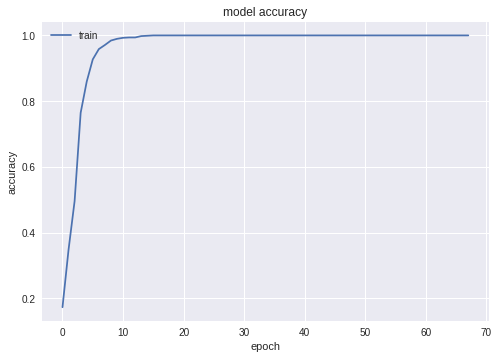

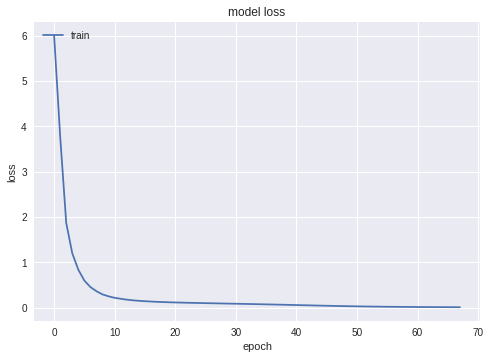

600/600 [==============================] - 2s 3ms/step
Test loss: 3.233165277640025
Test accuracy: 0.27666666587193806
(600, 10)
[[13  3  1  1  0  0  1  0  0 41]
 [ 2  7  1  8  0  0  2  0  0 40]
 [ 1  2 16  0  0  0  1  0  0 40]
 [ 0  2  4 11  0  0  3  0  0 40]
 [ 0  1  1  0 14  3  1  0  0 40]
 [ 0  0  0  1  1 12  5  1  0 40]
 [ 0  0  1  1  0  0 13  0  1 44]
 [ 0  0  4  1  3  1  1 10  0 40]
 [ 0  5  0  0  0  0  1  0 13 41]
 [ 0  1  2  0  0  0  0  0  0 57]]
              precision    recall  f1-score   support

           0       0.81      0.22      0.34        60
           1       0.33      0.12      0.17        60
           2       0.53      0.27      0.36        60
           3       0.48      0.18      0.27        60
           4       0.78      0.23      0.36        60
           5       0.75      0.20      0.32        60
           6       0.46      0.22      0.30        60
           7       0.91      0.17      0.28        60
           8       0.93      0.22      0.35        60

In [0]:
model = Sequential()
model.add(Conv1D(32, kernel_size=(10), activation='relu', data_format="channels_last"))
model.add(Conv1D(32, kernel_size=(3), activation='relu', data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Conv1D(64, kernel_size=(5), activation='relu', data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Conv1D(64, kernel_size=(1), activation='relu', data_format="channels_last"))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizers.SGD(lr=0.001, momentum=0.8, decay=0.0005),
              metrics=['accuracy'])
callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.01, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', 
                             verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)]
history = model.fit(train_x, train_y,batch_size=100,epochs=100,verbose=2,
                    validation_split=0.2,callbacks=callbacks)
model.summary()
print("Model Created") 

#plotting training
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
  #testing

s_model = load_model('best_model.h5')
score = s_model.evaluate(test_x, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred_y = model.predict(test_x)
print(pred_y.shape)
predy = np.argmax(pred_y, axis=1).T
print(confusion_matrix(testy, predy))
print(classification_report(testy, predy))


- struct 3
- early stopping worked
- test data has noise
- trains on new ppl data


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 960 samples, validate on 240 samples
Epoch 1/100
 - 10s - loss: 5.2928 - acc: 0.1854 - val_loss: 3.5591 - val_acc: 0.4500
Epoch 2/100
 - 10s - loss: 2.3455 - acc: 0.2917 - val_loss: 1.7308 - val_acc: 0.5625
Epoch 3/100
 - 10s - loss: 1.6824 - acc: 0.4896 - val_loss: 1.4315 - val_acc: 0.6583
Epoch 4/100
 - 10s - loss: 1.1934 - acc: 0.6896 - val_loss: 1.0845 - val_acc: 0.7958
Epoch 5/100
 - 10s - loss: 0.8558 - acc: 0.8260 - val_loss: 0.8821 - val_acc: 0.8708
Epoch 6/100
 - 10s - loss: 0.6714 - acc: 0.8792 - val_loss: 0.7203 - val_acc: 0.9458
Epoch 7/100
 - 10s - loss: 0.5091 - acc: 0.9292 - val_loss: 0.6320 - val_acc: 0.9625
Epoch 8/100
 - 10s - loss: 0.3921 - acc: 0.9656 - val_loss: 0.6199 - val_acc: 0.9625
Epoch 9/100
 - 10s - loss: 0.3568 - acc: 0.9667 - val_loss: 0.5395 - val_acc: 0.9750
Epoch 10/100
 - 10s - loss: 0.2935 - acc: 0.9844 - val_loss: 0.5153 -

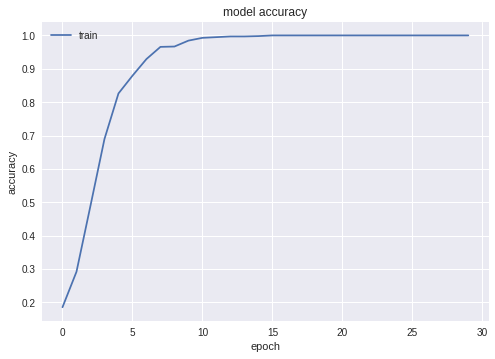

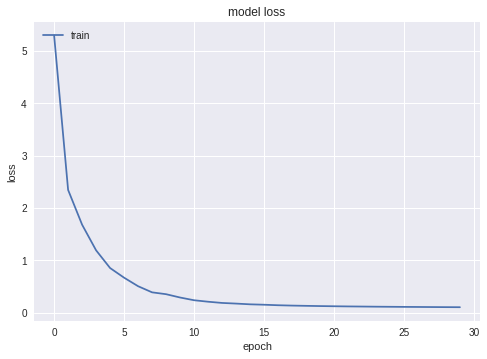

600/600 [==============================] - 2s 3ms/step
Test loss: 2.147708870569865
Test accuracy: 0.26166666587193804
(600, 10)
[[ 9  1  3  1  3  0  3  0  0 40]
 [ 1 15  0  1  0  0  3  0  0 40]
 [ 1  1 16  0  0  0  2  0  0 40]
 [ 0  1  3 13  1  0  1  1  0 40]
 [ 1  0  0  2 10  2  4  0  0 41]
 [ 0  0  0  0  1 14  3  0  0 42]
 [ 0  0  2  0  2  1 11  1  0 43]
 [ 1  0  3  0  0  4  1  8  2 41]
 [ 1  1  0  0  0  0  6  0 11 41]
 [ 3  0  3  0  0  2  1  1  0 50]]
              precision    recall  f1-score   support

           0       0.53      0.15      0.23        60
           1       0.79      0.25      0.38        60
           2       0.53      0.27      0.36        60
           3       0.76      0.22      0.34        60
           4       0.59      0.17      0.26        60
           5       0.61      0.23      0.34        60
           6       0.31      0.18      0.23        60
           7       0.73      0.13      0.23        60
           8       0.85      0.18      0.30        60

In [0]:
model = Sequential()
model.add(Conv1D(32, kernel_size=(10), activation='relu', data_format="channels_last"))
model.add(Conv1D(32, kernel_size=(3), activation='relu', data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Conv1D(64, kernel_size=(5), activation='relu', data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Conv1D(64, kernel_size=(1), activation='relu', data_format="channels_last"))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizers.SGD(lr=0.001, momentum=0.8, decay=0.0005),
              metrics=['accuracy'])
callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.01, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=True)]
history = model.fit(train_x, train_y,batch_size=100,epochs=100,verbose=2,
                    validation_split=0.2,callbacks=callbacks)
model.summary()
print("Model Created") 

#plotting training
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#testing
score = model.evaluate(test_x, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred_y = model.predict(test_x)
print(pred_y.shape)
predy = np.argmax(pred_y, axis=1).T
print(confusion_matrix(testy, predy))
print(classification_report(testy, predy))

- early stopping worked but accuracy didn't improve much
- best fit model was not used. Though it was used in the above program there wasn't change hence best fit was removed

Train on 960 samples, validate on 240 samples
Epoch 1/100
 - 10s - loss: 0.1074 - acc: 0.1177 - mean_absolute_error: 0.1792 - val_loss: 0.1058 - val_acc: 0.0792 - val_mean_absolute_error: 0.1821
Epoch 2/100
 - 10s - loss: 0.0997 - acc: 0.1292 - mean_absolute_error: 0.1767 - val_loss: 0.1007 - val_acc: 0.1417 - val_mean_absolute_error: 0.1760
Epoch 3/100
 - 10s - loss: 0.0955 - acc: 0.1813 - mean_absolute_error: 0.1731 - val_loss: 0.0966 - val_acc: 0.1792 - val_mean_absolute_error: 0.1727
Epoch 4/100
 - 10s - loss: 0.0917 - acc: 0.2229 - mean_absolute_error: 0.1695 - val_loss: 0.0930 - val_acc: 0.2125 - val_mean_absolute_error: 0.1674
Epoch 5/100
 - 10s - loss: 0.0892 - acc: 0.2646 - mean_absolute_error: 0.1659 - val_loss: 0.0902 - val_acc: 0.2500 - val_mean_absolute_error: 0.1646
Epoch 6/100
 - 10s - loss: 0.0872 - acc: 0.2771 - mean_absolute_error: 0.1640 - val_loss: 0.0931 - val_acc: 0.2208 - val_mean_absolute_error: 0.1685
Epoch 7/100
 - 10s - loss: 0.0855 - acc: 0.3063 - mean_absol

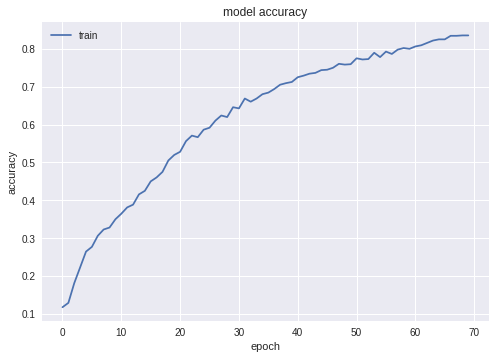

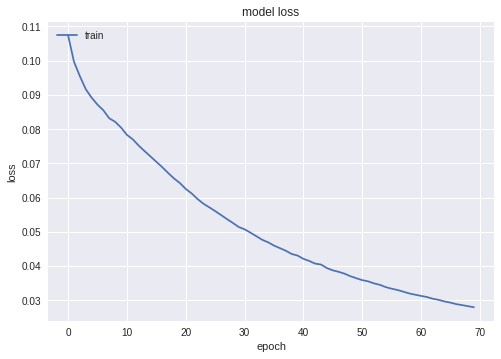

600/600 [==============================] - 2s 3ms/step
Test loss: 0.08803613205750783
Test accuracy: 0.18166666666666667
(600, 10)
[[ 9  2 28 12  3  0  2  2  1  1]
 [ 1  5 33 14  1  3  2  0  1  0]
 [ 0  2 51  6  0  0  1  0  0  0]
 [ 0  5 35 13  2  1  1  2  1  0]
 [ 1  1 29 13  7  1  4  2  0  2]
 [ 0  0 29 14  1  9  6  1  0  0]
 [ 3  3 30 15  1  3  2  1  1  1]
 [ 2  2 31 16  1  0  0  6  2  0]
 [ 0  0 33  7  2  9  3  1  5  0]
 [ 3  2 48  4  0  0  0  1  0  2]]
              precision    recall  f1-score   support

           0       0.47      0.15      0.23        60
           1       0.23      0.08      0.12        60
           2       0.15      0.85      0.25        60
           3       0.11      0.22      0.15        60
           4       0.39      0.12      0.18        60
           5       0.35      0.15      0.21        60
           6       0.10      0.03      0.05        60
           7       0.38      0.10      0.16        60
           8       0.45      0.08      0.14        

In [0]:
model = Sequential()
model.add(Conv1D(32, kernel_size=(10), activation='relu', data_format="channels_last"))
model.add(Conv1D(32, kernel_size=(3), activation='relu', data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Conv1D(64, kernel_size=(5), activation='relu', data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Conv1D(64, kernel_size=(1), activation='relu', data_format="channels_last"))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='mean_squared_error',
              optimizer=optimizers.SGD(lr=0.001, momentum=0.8, decay=0.0005),
              metrics=['accuracy', 'mae'])
callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=True)]
history = model.fit(train_x, train_y,batch_size=100,epochs=100,verbose=2,
                    validation_split=0.2,callbacks=callbacks)
model.summary()
print("Model Created") 

#plotting training
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#testing
score = model.evaluate(test_x, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred_y = model.predict(test_x)
print(pred_y.shape)
predy = np.argmax(pred_y, axis=1).T
print(confusion_matrix(testy, predy))
print(classification_report(testy, predy))